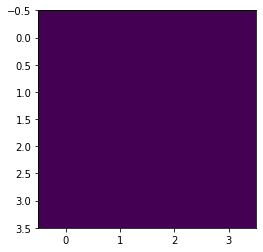

7

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np
plt.imshow(np.ones((4,4)))
plt.show()

from z_utils.utils_base_14 import *
from z_utils.utils_7343_01 import * 

import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 



class DatasetForTripletLoss:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        self.folder = []
        for folder_ in os.listdir(self.dir_name):
            self.folder.append(self.dir_name+folder_)
        self.l_=len(self.folder)
        self.indexes=np.array(range(self.l_))
        
    
    def __len__(self):
         
        return self.l_


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
         
        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 
        resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
         
        image_dims = np.expand_dims(resize_image, axis=2)
        if self.flag:
            print('file size:',np.array(image_dims).shape)
            plt.imshow(read_image)
            plt.show()
        return image_dims
    
        
    def __getitem__(self,idx):

        shuffle(self.indexes)
        #print(self.indexes)
        class_=np.zeros((1,self.l_))
        class_[0,self.indexes[0]]=1
        class_=class_[0,:]
        #print(class_)
        #Отсюда берем Anchor+Positive.
        folder_temp=[self.folder[i ] for i in self.indexes]
        #print(folder_temp[0]) 
        files_1 = self.photo_shuffle(str(folder_temp[0]))
        #print(self.indexes)
        #print(folder_temp[0])
        #print(class_) 
        #Отсюда берем Negativeю.
        files_2 = self.photo_shuffle(folder_temp[1])
         
        #Получаем путь к каждой фотографии из триплета и делаем ресайз.
        path_anchor = folder_temp[0] + '/' + files_1[0]
        #print(folder_temp[0])
        #print(files_1[0])
        
        
        #print('path_anchor:',path_anchor)
         
            
        anchor = self.resize(path_anchor)
        path_positive = folder_temp[0] + '/' + files_1[1]
        #print('path_positive:',path_positive)
         
            
        positive = self.resize(path_positive)
         
        path_negative =folder_temp[1] + '/' + files_2[0]
        if self.flag:
            print('path_negative:',path_negative)
        negative = self.resize(path_negative)
        #print(len(self.folder))

        return {'Anchor':anchor/255,
                'Positive':positive/255,
                'Negative':negative/255,
               'class_':class_}
###################################################
dataset1 = DatasetForTripletLoss('dog vs cat/dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=1)
l_=dataset1.l_
l_

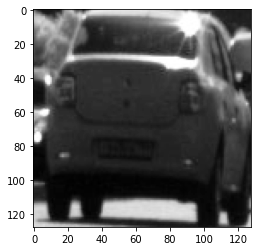

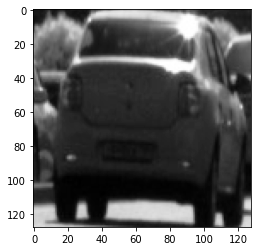

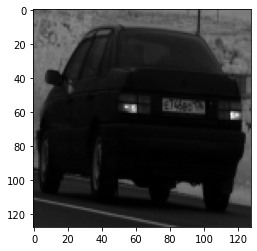

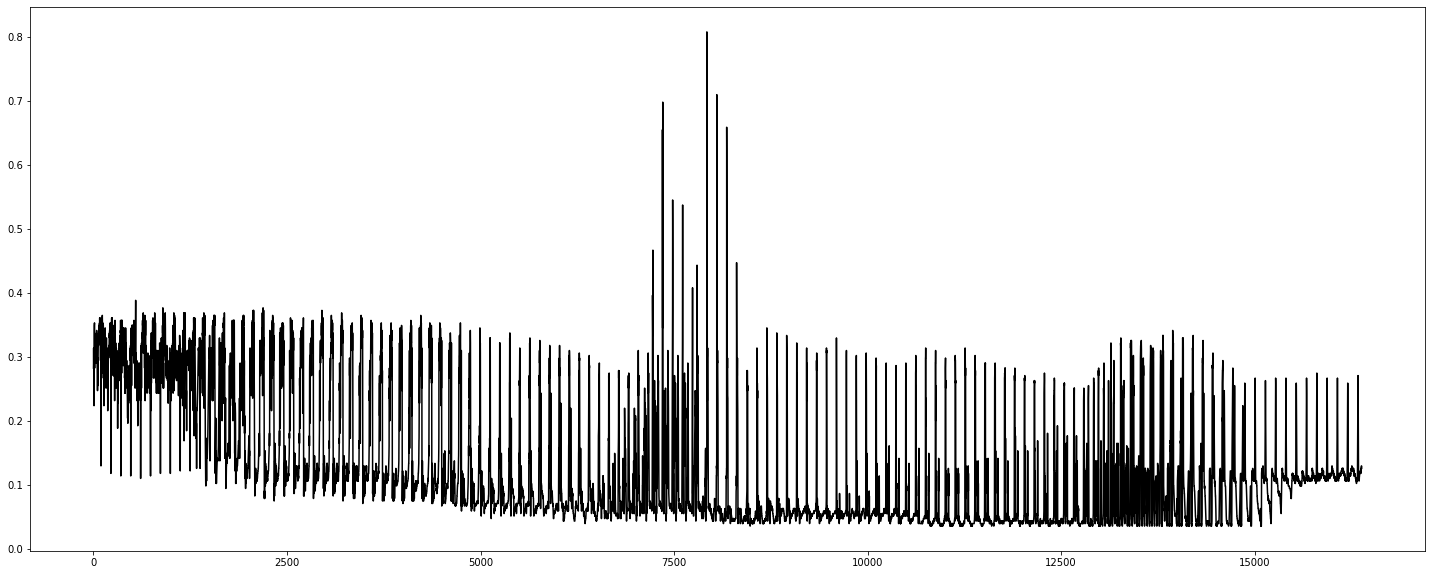

torch.Size([1, 7])


tensor([[0., 1., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [5]:
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
ai_2(Anchor[:,:,0])
Positive=batch['Positive'][0].numpy() 
ai_2(Positive[:,:,0])
Negative=batch['Negative'][0].numpy() 
ai_2(Negative[:,:,0])
plot_im(Negative[:,:,0])
class_=batch['class_'] 
print(class_.shape)
class_

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#import sys
import os
#import pathlib
import time
from z_utils.utils_base_14 import *
from z_utils.utils_mat_torch_003 import *
from z_utils.utils_7343_01 import *
from zz.Model_SRR_deep_YUV import model_SRR_03_1cannal_skotch
from zz.sketch2color_00 import N_sketch_2_color_00
 
from skimage.morphology import skeletonize, thin 
import numpy as np
from enum import Enum
from torch import nn
import torch.optim as optim
from zz.gan_struct_04a import Layer_09, quasy_conv_00,quasy_conv_01_soft, conv_layer_downsample_01,Layer_01

from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Flatten
from torch.nn import LeakyReLU
from torch.nn import ReLU
from torch.nn import Dropout
from torch.nn import Conv2d
from torch.nn import ConvTranspose2d
from torch.nn import Softmax  
from torch.nn import MaxPool2d,AvgPool2d
from enum import Enum
from torch.nn import Conv2d
from torch.nn import ConvTranspose2d
from torch.nn import BatchNorm2d,BatchNorm1d
from torch import nn
#####################################################################3
from zz.layers import Layer
from zz.layers.Input import Input
from zz.layers.Lambda import Lambda
from zz.layers.Reshape import Reshape
from zz.layers.Flatten import Flatten
from zz.utils.torchsummary import summary as _summary
from zz.utils.WrappedDataLoader import WrappedDataLoader
from zz.utils.History import History
from zz.utils.Regularizer import Regularizer
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from zz.Convolution_uno_01   import conv_layer_universal_uno_04,conv_layer_universal_uno_05
from zz.layers.Layer_01 import Layer_01
from zz.gan_struct_04a import Layer_06

In [8]:
################################################3
################################################3
class conv_simple_features_00(Layer_06):
    def __init__(self,  device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_00, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2) #Оптимизатор
        _layer_conv_31 = Conv2d(1,4, kernel_size=(5, 5),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        self.add_module('conv00', _layer_conv_31) 
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_conv_32 = Conv2d(4,16, kernel_size=(5,5),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        
        self.add_module('conv01', _layer_conv_32) 
        _layer_conv_33 = Conv2d(16,22, kernel_size=(3,3),
                            stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
          
        
        self.add_module('conv02', _layer_conv_33) 
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2))  
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( ))

        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, scatch0):
        im_01_dwnsmpl=self.conv00(scatch0)
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
        im_02_dwnsmpl=self.conv01(im_01_dwnsmpl)
        im_02_dwnsmpl=self.activation_LeakyReLU(im_02_dwnsmpl)
        if self.show:
            print('im_02_dwnsmpl',im_02_dwnsmpl.shape)    
        im_03_dwnsmpl=self.conv02(im_02_dwnsmpl)
        im_03_dwnsmpl=self.Pool_00(im_03_dwnsmpl) 
        im_03_dwnsmpl=self.activation_LeakyReLU(im_03_dwnsmpl)
        if self.show:
            print('im_03_dwnsmpl',im_03_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_03_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00
################################################3
class fully_connect_modul_264(Layer_06):
    def __init__(self,  device = None, L1 = 0., L2 = 0., numclasses=9, show=0):
        super(fully_connect_modul_264, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.numclasses =numclasses        
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(352, 256, bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(256)
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(256, 128, bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(128,  self.numclasses, bias = True)
        self.add_module('D03', _layer_D03)
       
        
        _layer_SfTMax = Softmax(dim = -1)
        self.add_module('SfTMax', _layer_SfTMax)  
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
        #########################
        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, vect_00):
        vect_01=self.D01(vect_00)        
        vect_01=self.Dropout01(vect_01)
        vect_01=self.activation_LeakyReLU(vect_01)
        if self.show:
            print('vect_01',vect_01.shape) 
        vect_01=self.layer_batch_norm(vect_01)
        if self.show:
            print('vect_01 layer_batch_norm',vect_01.shape) 
        vect_02=self.D02(vect_01) 
        vect_02=self.activation_LeakyReLU(vect_02)
        if self.show:
            print('vect_02',vect_02.shape)    
        vect_03=self.D03(vect_02) 
        vect_03=self.SfTMax(vect_03) 
         
        if self.show:
            print('vect_03',vect_03.shape)         
        return vect_03
################################################3
class fully_connect_modul_265(Layer_06):
    def __init__(self,  device = None, L1 = 0., L2 = 0.,   show=0):
        super(fully_connect_modul_265, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
             
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(352, 256, bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(256)
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(256, 128, bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(128,  64, bias = True)
        self.add_module('D03', _layer_D03)
       
        
        
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
        #########################
        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, vect_00):
        vect_01=self.D01(vect_00)        
        vect_01=self.Dropout01(vect_01)
        vect_01=self.activation_LeakyReLU(vect_01)
        if self.show:
            print('vect_01',vect_01.shape) 
        vect_01=self.layer_batch_norm(vect_01)
        if self.show:
            print('vect_01 layer_batch_norm',vect_01.shape) 
        vect_02=self.D02(vect_01) 
        vect_02=self.activation_LeakyReLU(vect_02)
        if self.show:
            print('vect_02',vect_02.shape)    
        vect_03=self.D03(vect_02) 
        
         
        if self.show:
            print('vect_03',vect_03.shape)         
        return vect_03

#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class TL_002_mehanit(Layer_06):
    def __init__(self, imageSize,  last_activate, L1 = 0., L2 = 0.,device = None,numclasses=10,show=0 ):
        super(TL_002_mehanit, self).__init__( (imageSize[0],imageSize[1],1),imageSize   )    

        #self.class_name = str(self.__class__).split(".")[-1].split("'")[0]
        self.class_name = self.__class__.__name__
        self.last_activate = last_activate
        self.cannal_in= imageSize[2]
         
        self.imageSize = imageSize
        self.regularizer = Regularizer(L1, L2)
        self.show=show
        self.L1=L1
        self.L2=L2
        self.numclasses=numclasses 
        self.criterion_tml = torch.nn.TripletMarginLoss(margin=1.0, p=2)
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")

        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        ##############3
        self.conv2Dfeatures=conv_simple_features_00(device,L1 ,L2,show) 
        self.fully_connect_modul_0=fully_connect_modul_264(device,L1 ,L2,numclasses,show) 
        self.fully_connect_modul_TL=fully_connect_modul_265(device,L1 ,L2,show) 
         #######################
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(352, 256, bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(256)
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(256, 128, bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(128,  self.numclasses, bias = True)
        self.add_module('D03', _layer_D03)
        #########################
        
        _layer_SfTMax = Softmax(dim = -1)
        self.add_module('SfTMax', _layer_SfTMax)  
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
 
        self.to(self.device)
        
        self.reset_parameters()
    #####################################################
    def forward(self, scatch, im_wire):
        # skotch_N_global, Ref_global,sketch_ref
        class _type_input(Enum):
            is_torch_tensor = 0
            is_numpy = 1
            is_list = 2
        
           
        x_input = (scatch , im_wire)
        
        _t_input = []
        _x_input = []
        for x in x_input:
            if isinstance(x, (torch.Tensor)):
                _t_input.append(_type_input.is_torch_tensor)
                _x_input.append(x)
            elif isinstance(x, (np.ndarray)):
                _t_input.append(_type_input.is_numpy)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            elif isinstance(x, (list, tuple)):
                _t_input.append(_type_input.is_list)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            else:
                raise Exception('Invalid type input')

        _x_input = tuple(_x_input)
        _t_input = tuple(_t_input)

        scatch = self._contiguous(_x_input[0])
        im_wire = self._contiguous(_x_input[1])
         
         
        ##############
        
            
        
        _layer_permut_channelfirst = Lambda(lambda x:  x.permute((0, 3, 1, 2)))
        _layer_permut_channellast = Lambda(lambda x:  x.permute((0, 2, 3, 1)))

        scatch0 = _layer_permut_channelfirst(scatch)
        vect_00=self.conv2Dfeatures(scatch0)
        vect_03=self.fully_connect_modul_0(vect_00)    
        ################################# 
         
        ######################################
        x = vect_03
        x = self._contiguous(x)

        ###################    

        if _type_input.is_torch_tensor in _t_input:
            pass
        elif _type_input.is_numpy in _t_input:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy()
            else:
                x = x.detach().numpy()
        else:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy().tolist()
            else:
                x = x.detach().numpy().tolist()

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return x
     
    def _get_regularizer(self):
        return self.regularizer
#################################################################
###################################################################################################
    def loss_batch_02(self,dsrmn_model,  x,   opt=None):
#            def cross_entropy(pred, soft_targets):
#                return -torch.log(torch.mean(torch.sum(soft_targets * pred, 1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
#            def l2_norm_diff(pred, soft_targets):
#                return  torch.sqrt(torch.mean(torch.sum((soft_targets - pred )**2,-1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
        
        xb=(x[0],x[0]) 
        pred_ancor_0,_ = self.forward_eshar_00(*xb)
        xb=(x[1],x[1])
        pred_positive_0,_ = self.forward_eshar_00(*xb)
        xb=(x[2],x[2])
        pred_neg_0,_ = self.forward_eshar_00(*xb)
        #print('self._criterion',self._criterion)
        loss_0=self.criterion_tml (pred_ancor_0,pred_positive_0,pred_neg_0)
        loss_1=0#self.criterion_tml (pred_ancor_1,pred_positive_1,pred_neg_1)
            
            
            
             
            
             
         
        loss =1.0*loss_0+0.9*loss_1 
        
         
        #print(' loss', loss) #,end='')    
       
        #print(self.loss_vgg_1_bw(pred0, yb),self._criterion(pred0, yb),self.MSELoss( dscrm_tenzor,0*dscrm_tenzor))
         
        
        #loss+=  2.1*loss_mse 
        #loss = loss_func(pred0, yb)
        #loss = cross_entropy(pred, yb)

        #del(pred_ancor_0,pred_ancor_1,pred_positive_0,pred_positive_1,pred_neg_0,pred_neg_1) 

        #_, predicted = torch.max(pred.data, dim = 1)
        #_, ind_target = torch.max(yb, dim = 1)
        #correct = (predicted == ind_target).sum().item()
        #acc = correct / len(yb) #.size(0)

        _regularizer = self._get_regularizer()

        reg_loss = 0
        for param in self.parameters():
            reg_loss += _regularizer(param)

        loss += reg_loss

        if (opt is not None) :
            with torch.no_grad():

                opt.zero_grad()

                loss.backward()

                opt.step()

        self.count+=1
        if self.count  %3==0:
            print("*", end='')

        loss_item = loss.item()

        del loss
        del reg_loss
        
        return loss_item, 1#, acc
################################################################
    #####################################################
    def forward_eshar_00(self, scatch, im_wire):
        # skotch_N_global, Ref_global,sketch_ref
        class _type_input(Enum):
            is_torch_tensor = 0
            is_numpy = 1
            is_list = 2
        
           
        x_input = (scatch , im_wire)
        
        _t_input = []
        _x_input = []
        for x in x_input:
            if isinstance(x, (torch.Tensor)):
                _t_input.append(_type_input.is_torch_tensor)
                _x_input.append(x)
            elif isinstance(x, (np.ndarray)):
                _t_input.append(_type_input.is_numpy)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            elif isinstance(x, (list, tuple)):
                _t_input.append(_type_input.is_list)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            else:
                raise Exception('Invalid type input')

        _x_input = tuple(_x_input)
        _t_input = tuple(_t_input)

        scatch = self._contiguous(_x_input[0])
        im_wire = self._contiguous(_x_input[1])
         
         
        ##############
        
            
        
        _layer_permut_channelfirst = Lambda(lambda x:  x.permute((0, 3, 1, 2)))
        _layer_permut_channellast = Lambda(lambda x:  x.permute((0, 2, 3, 1)))

        scatch0 = _layer_permut_channelfirst(scatch)
        vect_00=self.conv2Dfeatures(scatch0)
        vect_03=self.fully_connect_modul_TL(vect_00)    
        ################################# 
         
        ######################################
        x = vect_03
        x = self._contiguous(x)

        ###################    

        if _type_input.is_torch_tensor in _t_input:
            pass
        elif _type_input.is_numpy in _t_input:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy()
            else:
                x = x.detach().numpy()
        else:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy().tolist()
            else:
                x = x.detach().numpy().tolist()

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return x,0
     
    def _get_regularizer(self):
        return self.regularizer

###################################################################
    def loss_batch_01(self,dsrmn_model, xb, yb,   opt=None):
#            def cross_entropy(pred, soft_targets):
#                return -torch.log(torch.mean(torch.sum(soft_targets * pred, 1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
#            def l2_norm_diff(pred, soft_targets):
#                return  torch.sqrt(torch.mean(torch.sum((soft_targets - pred )**2,-1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))

        #print(xb[0].shape)
        pred = self(*xb)
        #print(pred)  
        Positive=xb[0][0].numpy() 
        #ai_2(Positive[:,:,0])
        #print(yb)        
        #print('999999999999999999999999999999999')    

        if isinstance(pred, tuple):
            pred0 = pred[0]
            del pred
        else:
            pred0 = pred
        loss=0
        
        #loss_mse= self._criterion(pred0, yb) 
        #print(pred0.shape)
        #print(yb.shape)
        MSELoss=nn.MSELoss(reduction='mean')    
        loss_mse= MSELoss(pred0, yb) 
         
        
        loss +=1.1*loss_mse 
       
        #print(self.loss_vgg_1_bw(pred0, yb),self._criterion(pred0, yb),self.MSELoss( dscrm_tenzor,0*dscrm_tenzor))
         
        
        #loss+=  2.1*loss_mse 
        #loss = loss_func(pred0, yb)
        #loss = cross_entropy(pred, yb)

        del pred0

        #_, predicted = torch.max(pred.data, dim = 1)
        #_, ind_target = torch.max(yb, dim = 1)
        #correct = (predicted == ind_target).sum().item()
        #acc = correct / len(yb) #.size(0)

        _regularizer = self._get_regularizer()

        reg_loss = 0
        for param in self.parameters():
            reg_loss += _regularizer(param)

        loss += reg_loss

        if (opt is not None)  :
            with torch.no_grad():

                opt.zero_grad()

                loss.backward()

                opt.step()

        self.count+=1
        if self.count  %3==0:
            print("*", end='')

        loss_item = loss.item()

        del loss
        del reg_loss

        return loss_item, len(yb)#, acc

    
################################################################
    def fit_dataloader_CLASS(self, dscrm_model,loader,   epochs = 1, validation_loader = None):
        #_criterion = nn.CrossEntropyLoss(reduction='mean')
        #_optimizer = optim.AdamW(self.parameters())
        #_optimizer = optim.Adam(self.parameters(), lr = 0.00001)#, eps=0.0)
        if (self._criterion is None): # or not isinstance(self._criterion, nn._Loss):
            raise Exception("Loss-function is not select!")

        if (self._optimizer is None) or not isinstance(self._optimizer, optim.Optimizer):
            raise Exception("Optimizer is not select!")

#        _criterion = nn.MSELoss(reduction='mean')
#        _optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.2)


         
            
            
        history = History()
        self.count=0
        for epoch in range(epochs):
            self._optimizer.zero_grad()
            
            print("Epoch {0}/{1}".format(epoch, epochs), end='')
            
            self.train()
            ########################################3
             
            
            ### train mode ###
            print("[", end='')
            losses=[]
            nums=[]
            for s in loader:
                
 
                
                train_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['class_'].numpy()).to(self.device)  
                                        )
                
                 
                
                 
                
                images_Anchor=train_ds.tensors[0] 
                 
                class_=train_ds.tensors[1]
                 

                
                
                

                losses_, nums_   =   self.loss_batch_01(dscrm_model, \
                                                   (images_Anchor ,images_Anchor ),\
                                                    class_,  self._optimizer)                                                                                                       


                losses.append(losses_)
                nums.append(nums_ )
                 
                
            print("]", end='')


            sum_nums = np.sum(nums)
            loss = np.sum(np.multiply(losses, nums)) / sum_nums
            ######################################
             
            ### test mode ###
            if validation_loader is not None:
                 


                self.eval()
                
                 
                print("[", end='')
                losses=[]
                nums=[]
                for s in validation_loader:
                #s = next(iter(loader))
                
                    val_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['class_'].numpy()).to(self.device)  
 
                                        )
                

                    images_Anchor=val_ds.tensors[0] 

                    class_=val_ds.tensors[1]
                     
                
                 
                
                     
                
                

  
                      
                    
                                                                                                                         

                    losses_, nums_   =  \
                    self.loss_batch_01( dscrm_model,\
                           (images_Anchor ,images_Anchor ),\
                           class_, self._optimizer)      

                    losses.append(losses_)
                    nums.append(nums_ )
                print("]", end='')


                sum_nums = np.sum(nums)
                val_loss = np.sum(np.multiply(losses, nums)) / sum_nums
                    #acc = np.sum(np.multiply(accs, nums)) / sum_nums
                #################################################
                history.add_epoch_values(epoch, {'loss': loss, 'val_loss': val_loss})
                
                print(' - Loss: {:.6f}'.format(loss), end='')
                print(' - Test-loss: {:.6f}'.format(val_loss), end='')
            else:
                history.add_epoch_values(epoch, {'loss': loss })
                print(' - Loss: {:.6f}'.format(loss), end='')
                
            print("")
            
 
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return history
################################################################
    def fit_dataloader_TL(self, dscrm_model,loader,   epochs = 1, validation_loader = None):
        #_criterion = nn.CrossEntropyLoss(reduction='mean')
        #_optimizer = optim.AdamW(self.parameters())
        #_optimizer = optim.Adam(self.parameters(), lr = 0.00001)#, eps=0.0)
        if (self._criterion is None): # or not isinstance(self._criterion, nn._Loss):
            raise Exception("Loss-function is not select!")

        if (self._optimizer is None) or not isinstance(self._optimizer, optim.Optimizer):
            raise Exception("Optimizer is not select!")

#        _criterion = nn.MSELoss(reduction='mean')
#        _optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.2)


         
            
            
        history = History()
        self.count=0
        for epoch in range(epochs):
            self._optimizer.zero_grad()
            
            print("Epoch {0}/{1}".format(epoch, epochs), end='')
            
            self.train()
            ########################################3
             
            
            ### train mode ###
            print("[", end='')
            losses=[]
            nums=[]
            for s in loader:
                
 
                
                train_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['Positive'].numpy()).to(self.device) ,
                                        torch.FloatTensor(s['Negative'].numpy()).to(self.device) 
                                        
                                        )
                
                 
                
                 
                
                images_Anchor=train_ds.tensors[0] 
                 
                images_Positive=train_ds.tensors[1]
                images_Negative=train_ds.tensors[2]

                
                
                

                losses_, nums_   =   self.loss_batch_02(dscrm_model, \
                                                   (images_Anchor ,images_Positive,images_Negative ),\
                                                      self._optimizer)                                                                                                       


                losses.append(losses_)
                nums.append(nums_ )
                 
                
            print("]", end='')


            sum_nums = np.sum(nums)
            loss = np.sum(np.multiply(losses, nums)) / sum_nums
            ######################################
             
            ### test mode ###
            if validation_loader is not None:
                 


                self.eval()
                
                 
                print("[", end='')
                losses=[]
                nums=[]
                for s in validation_loader:
                #s = next(iter(loader))
                
                    val_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['Positive'].numpy()).to(self.device) ,
                                        torch.FloatTensor(s['Negative'].numpy()).to(self.device) 
                                        
                                        )
                

                    images_Anchor=val_ds.tensors[0] 

                    images_Positive=val_ds.tensors[1]
                    images_Negative=val_ds.tensors[2]
                
                 
                
                     
                
                

  
                      
                    
                                                                                                                         

                    losses_, nums_   =  \
                    self.loss_batch_00( dscrm_model,\
                           (images_Anchor ,images_Positive,images_Negative ),\
                            self._optimizer)      

                    losses.append(losses_)
                    nums.append(nums_ )
                print("]", end='')


                sum_nums = np.sum(nums)
                val_loss = np.sum(np.multiply(losses, nums)) / sum_nums
                    #acc = np.sum(np.multiply(accs, nums)) / sum_nums
                #################################################
                history.add_epoch_values(epoch, {'loss': loss, 'val_loss': val_loss})
                
                print(' - Loss: {:.6f}'.format(loss), end='')
                print(' - Test-loss: {:.6f}'.format(val_loss), end='')
            else:
                history.add_epoch_values(epoch, {'loss': loss })
                print(' - Loss: {:.6f}'.format(loss), end='')
                
            print("")
            
 
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return history
    
###########################################

     
####################################################### 
###########################################
dataset1 = DatasetForTripletLoss('c:/IMAGE_PROCESSING/NeyralNetwork/TripletLoss/DATAbase/000/',0) 
dataloader = DataLoader(dataset1, batch_size=5,drop_last=True )
IMAGE_SIZE = [128, 128, 1]   
TL_001 = TL_002_mehanit(imageSize = IMAGE_SIZE, last_activate='linear', device='cpu',numclasses=dataset1.l_ ,show=0)
 
TL_001.compile(criterion='000', optimizer='adam', lr=0.0011, momentum=0.5)
TL_001.summary()
#TL_001.load_state('TL_01.pt')
TL_001.conv2Dfeatures.load_state('conv2Dfeatures01.pt')
TL_001.fully_connect_modul_0.load_state('fully_connect_modul00.pt')         
TL_001.fully_connect_modul_TL.load_state('fully_connect_modul01.pt')         

C:\Users\HPProBook640G1\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             104
         LeakyReLU-2            [-1, 4, 32, 32]               0
            Conv2d-3             [-1, 16, 8, 8]           1,616
         LeakyReLU-4             [-1, 16, 8, 8]               0
            Conv2d-5             [-1, 22, 8, 8]           3,190
         MaxPool2d-6             [-1, 22, 4, 4]               0
         LeakyReLU-7             [-1, 22, 4, 4]               0
           Flatten-8                  [-1, 352]               0
conv_simple_features_00-9                  [-1, 352]               0
           Linear-10                  [-1, 256]          90,368
          Dropout-11                  [-1, 256]               0
        LeakyReLU-12                  [-1, 256]               0
      BatchNorm1d-13                  [-1, 256]             512
           Linear-14              

Epoch 0/1000[****] - Loss: 0.017453
Epoch 1/1000[****] - Loss: 0.017454
Epoch 2/1000[****] - Loss: 0.017447
Epoch 3/1000[****] - Loss: 0.017445
Epoch 4/1000[****] - Loss: 0.017447
Epoch 5/1000[****] - Loss: 0.017425
Epoch 6/1000[****] - Loss: 0.017433
Epoch 7/1000[****] - Loss: 0.017414
Epoch 8/1000[****] - Loss: 0.017391
Epoch 9/1000[****] - Loss: 0.017388
Epoch 10/1000[****] - Loss: 0.017361
Epoch 11/1000[****] - Loss: 0.017239
Epoch 12/1000[****] - Loss: 0.017208
Epoch 13/1000[****] - Loss: 0.017278
Epoch 14/1000[****] - Loss: 0.016982
Epoch 15/1000[****] - Loss: 0.016938
Epoch 16/1000[****] - Loss: 0.016824
Epoch 17/1000[****] - Loss: 0.016671
Epoch 18/1000[****] - Loss: 0.016968
Epoch 19/1000[****] - Loss: 0.016819
Epoch 20/1000[****] - Loss: 0.016212
Epoch 21/1000[****] - Loss: 0.016229
Epoch 22/1000[****] - Loss: 0.016827
Epoch 23/1000[****] - Loss: 0.016623
Epoch 24/1000[****] - Loss: 0.016024
Epoch 25/1000[****] - Loss: 0.016010
Epoch 26/1000[****] - Loss: 0.016263
Epoch 27/10

Epoch 219/1000[****] - Loss: 0.006659
Epoch 220/1000[****] - Loss: 0.006693
Epoch 221/1000[****] - Loss: 0.006581
Epoch 222/1000[****] - Loss: 0.005178
Epoch 223/1000[****] - Loss: 0.006222
Epoch 224/1000[****] - Loss: 0.007637
Epoch 225/1000[****] - Loss: 0.007826
Epoch 226/1000[****] - Loss: 0.007056
Epoch 227/1000[****] - Loss: 0.005684
Epoch 228/1000[****] - Loss: 0.006863
Epoch 229/1000[****] - Loss: 0.006118
Epoch 230/1000[****] - Loss: 0.005408
Epoch 231/1000[****] - Loss: 0.004832
Epoch 232/1000[****] - Loss: 0.004566
Epoch 233/1000[****] - Loss: 0.007423
Epoch 234/1000[****] - Loss: 0.005827
Epoch 235/1000[****] - Loss: 0.007551
Epoch 236/1000[****] - Loss: 0.006511
Epoch 237/1000[****] - Loss: 0.004221
Epoch 238/1000[****] - Loss: 0.006468
Epoch 239/1000[****] - Loss: 0.006652
Epoch 240/1000[****] - Loss: 0.005961
Epoch 241/1000[****] - Loss: 0.005016
Epoch 242/1000[****] - Loss: 0.005657
Epoch 243/1000[****] - Loss: 0.003638
Epoch 244/1000[****] - Loss: 0.006120
Epoch 245/10

Epoch 435/1000[****] - Loss: 0.004097
Epoch 436/1000[****] - Loss: 0.004679
Epoch 437/1000[****] - Loss: 0.003537
Epoch 438/1000[****] - Loss: 0.005913
Epoch 439/1000[****] - Loss: 0.003550
Epoch 440/1000[****] - Loss: 0.006033
Epoch 441/1000[****] - Loss: 0.004509
Epoch 442/1000[****] - Loss: 0.003664
Epoch 443/1000[****] - Loss: 0.005759
Epoch 444/1000[****] - Loss: 0.003851
Epoch 445/1000[****] - Loss: 0.005344
Epoch 446/1000[****] - Loss: 0.005193
Epoch 447/1000[****] - Loss: 0.008459
Epoch 448/1000[****] - Loss: 0.005922
Epoch 449/1000[****] - Loss: 0.005345
Epoch 450/1000[****] - Loss: 0.004695
Epoch 451/1000[****] - Loss: 0.005067
Epoch 452/1000[****] - Loss: 0.006057
Epoch 453/1000[****] - Loss: 0.005408
Epoch 454/1000[****] - Loss: 0.004494
Epoch 455/1000[****] - Loss: 0.004659
Epoch 456/1000[****] - Loss: 0.003253
Epoch 457/1000[****] - Loss: 0.005652
Epoch 458/1000[****] - Loss: 0.002769
Epoch 459/1000[****] - Loss: 0.002823
Epoch 460/1000[****] - Loss: 0.002307
Epoch 461/10

Epoch 651/1000[****] - Loss: 0.004945
Epoch 652/1000[****] - Loss: 0.005768
Epoch 653/1000[****] - Loss: 0.005632
Epoch 654/1000[****] - Loss: 0.002922
Epoch 655/1000[****] - Loss: 0.004597
Epoch 656/1000[****] - Loss: 0.005031
Epoch 657/1000[****] - Loss: 0.004957
Epoch 658/1000[****] - Loss: 0.003524
Epoch 659/1000[****] - Loss: 0.003727
Epoch 660/1000[****] - Loss: 0.004569
Epoch 661/1000[****] - Loss: 0.005560
Epoch 662/1000[****] - Loss: 0.004484
Epoch 663/1000[****] - Loss: 0.004264
Epoch 664/1000[****] - Loss: 0.007677
Epoch 665/1000[****] - Loss: 0.003026
Epoch 666/1000[****] - Loss: 0.004688
Epoch 667/1000[****] - Loss: 0.004217
Epoch 668/1000[****] - Loss: 0.005637
Epoch 669/1000[****] - Loss: 0.004371
Epoch 670/1000[****] - Loss: 0.003599
Epoch 671/1000[****] - Loss: 0.005588
Epoch 672/1000[****] - Loss: 0.005723
Epoch 673/1000[****] - Loss: 0.005771
Epoch 674/1000[****] - Loss: 0.004940
Epoch 675/1000[****] - Loss: 0.004255
Epoch 676/1000[****] - Loss: 0.005291
Epoch 677/10

Epoch 867/1000[****] - Loss: 0.005782
Epoch 868/1000[****] - Loss: 0.002832
Epoch 869/1000[****] - Loss: 0.002806
Epoch 870/1000[****] - Loss: 0.003156
Epoch 871/1000[****] - Loss: 0.004962
Epoch 872/1000[****] - Loss: 0.004590
Epoch 873/1000[****] - Loss: 0.004099
Epoch 874/1000[****] - Loss: 0.003402
Epoch 875/1000[****] - Loss: 0.004689
Epoch 876/1000[****] - Loss: 0.005104
Epoch 877/1000[****] - Loss: 0.004321
Epoch 878/1000[****] - Loss: 0.003992
Epoch 879/1000[****] - Loss: 0.004737
Epoch 880/1000[****] - Loss: 0.004809
Epoch 881/1000[****] - Loss: 0.005278
Epoch 882/1000[****] - Loss: 0.004876
Epoch 883/1000[****] - Loss: 0.003579
Epoch 884/1000[****] - Loss: 0.003163
Epoch 885/1000[****] - Loss: 0.006395
Epoch 886/1000[****] - Loss: 0.004147
Epoch 887/1000[****] - Loss: 0.004521
Epoch 888/1000[****] - Loss: 0.003062
Epoch 889/1000[****] - Loss: 0.004958
Epoch 890/1000[****] - Loss: 0.004104
Epoch 891/1000[****] - Loss: 0.004110
Epoch 892/1000[****] - Loss: 0.003199
Epoch 893/10

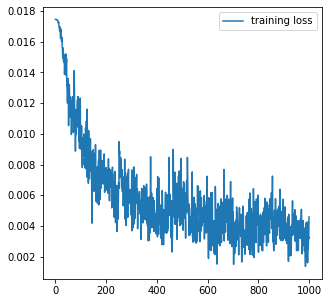

loss:   0.004583364898887036
Epoch 0/1000[*******] - Loss: 0.004447
Epoch 1/1000[*******] - Loss: 0.006466
Epoch 2/1000[*******] - Loss: 0.008991
Epoch 3/1000[*******] - Loss: 0.004827
Epoch 4/1000[*******] - Loss: 0.005733
Epoch 5/1000[*******] - Loss: 0.006913
Epoch 6/1000[*******] - Loss: 0.007100
Epoch 7/1000[*******] - Loss: 0.005178
Epoch 8/1000[*******] - Loss: 0.007113
Epoch 9/1000[*******] - Loss: 0.007018
Epoch 10/1000[*******] - Loss: 0.004717
Epoch 11/1000[*******] - Loss: 0.006055
Epoch 12/1000[*******] - Loss: 0.004955
Epoch 13/1000[*******] - Loss: 0.004218
Epoch 14/1000[*******] - Loss: 0.009092
Epoch 15/1000[*******] - Loss: 0.006752
Epoch 16/1000[*******] - Loss: 0.007486
Epoch 17/1000[*******] - Loss: 0.005166
Epoch 18/1000[*******] - Loss: 0.007341
Epoch 19/1000[*******] - Loss: 0.007388
Epoch 20/1000[*******] - Loss: 0.006812
Epoch 21/1000[*******] - Loss: 0.007091
Epoch 22/1000[*******] - Loss: 0.006725
Epoch 23/1000[*******] - Loss: 0.004922
Epoch 24/1000[*******

Epoch 202/1000[*******] - Loss: 0.008370
Epoch 203/1000[*******] - Loss: 0.008526
Epoch 204/1000[*******] - Loss: 0.006992
Epoch 205/1000[*******] - Loss: 0.006209
Epoch 206/1000[*******] - Loss: 0.008569
Epoch 207/1000[*******] - Loss: 0.006650
Epoch 208/1000[*******] - Loss: 0.006052
Epoch 209/1000[*******] - Loss: 0.005983
Epoch 210/1000[*******] - Loss: 0.006705
Epoch 211/1000[*******] - Loss: 0.006181
Epoch 212/1000[*******] - Loss: 0.008323
Epoch 213/1000[*******] - Loss: 0.007907
Epoch 214/1000[*******] - Loss: 0.005665
Epoch 215/1000[*******] - Loss: 0.007804
Epoch 216/1000[*******] - Loss: 0.004698
Epoch 217/1000[*******] - Loss: 0.008488
Epoch 218/1000[*******] - Loss: 0.004619
Epoch 219/1000[*******] - Loss: 0.005492
Epoch 220/1000[*******] - Loss: 0.008572
Epoch 221/1000[*******] - Loss: 0.007241
Epoch 222/1000[*******] - Loss: 0.006086
Epoch 223/1000[*******] - Loss: 0.006266
Epoch 224/1000[*******] - Loss: 0.004256
Epoch 225/1000[*******] - Loss: 0.006653
Epoch 226/1000[*

Epoch 402/1000[*******] - Loss: 0.006786
Epoch 403/1000[*******] - Loss: 0.005314
Epoch 404/1000[*******] - Loss: 0.006221
Epoch 405/1000[*******] - Loss: 0.008132
Epoch 406/1000[*******] - Loss: 0.008031
Epoch 407/1000[*******] - Loss: 0.009246
Epoch 408/1000[*******] - Loss: 0.007721
Epoch 409/1000[*******] - Loss: 0.008407
Epoch 410/1000[*******] - Loss: 0.007933
Epoch 411/1000[*******] - Loss: 0.010884
Epoch 412/1000[*******] - Loss: 0.007207
Epoch 413/1000[*******] - Loss: 0.006905
Epoch 414/1000[*******] - Loss: 0.009000
Epoch 415/1000[*******] - Loss: 0.008510
Epoch 416/1000[*******] - Loss: 0.009432
Epoch 417/1000[*******] - Loss: 0.008533
Epoch 418/1000[*******] - Loss: 0.008145
Epoch 419/1000[*******] - Loss: 0.007945
Epoch 420/1000[*******] - Loss: 0.008655
Epoch 421/1000[*******] - Loss: 0.006412
Epoch 422/1000[*******] - Loss: 0.006185
Epoch 423/1000[*******] - Loss: 0.008859
Epoch 424/1000[*******] - Loss: 0.008317
Epoch 425/1000[*******] - Loss: 0.006665
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.006541
Epoch 603/1000[*******] - Loss: 0.006395
Epoch 604/1000[*******] - Loss: 0.004436
Epoch 605/1000[*******] - Loss: 0.006471
Epoch 606/1000[*******] - Loss: 0.008220
Epoch 607/1000[*******] - Loss: 0.006724
Epoch 608/1000[*******] - Loss: 0.005797
Epoch 609/1000[*******] - Loss: 0.008250
Epoch 610/1000[*******] - Loss: 0.008138
Epoch 611/1000[*******] - Loss: 0.005969
Epoch 612/1000[*******] - Loss: 0.008333
Epoch 613/1000[*******] - Loss: 0.005154
Epoch 614/1000[*******] - Loss: 0.005527
Epoch 615/1000[*******] - Loss: 0.004318
Epoch 616/1000[*******] - Loss: 0.006681
Epoch 617/1000[*******] - Loss: 0.005191
Epoch 618/1000[*******] - Loss: 0.005484
Epoch 619/1000[*******] - Loss: 0.005048
Epoch 620/1000[*******] - Loss: 0.004550
Epoch 621/1000[*******] - Loss: 0.006427
Epoch 622/1000[*******] - Loss: 0.004991
Epoch 623/1000[*******] - Loss: 0.004845
Epoch 624/1000[*******] - Loss: 0.005448
Epoch 625/1000[*******] - Loss: 0.007679
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.007702
Epoch 803/1000[*******] - Loss: 0.006887
Epoch 804/1000[*******] - Loss: 0.008164
Epoch 805/1000[*******] - Loss: 0.007171
Epoch 806/1000[*******] - Loss: 0.010388
Epoch 807/1000[*******] - Loss: 0.008403
Epoch 808/1000[*******] - Loss: 0.008849
Epoch 809/1000[*******] - Loss: 0.007993
Epoch 810/1000[*******] - Loss: 0.006547
Epoch 811/1000[*******] - Loss: 0.007880
Epoch 812/1000[*******] - Loss: 0.009041
Epoch 813/1000[*******] - Loss: 0.009393
Epoch 814/1000[*******] - Loss: 0.005157
Epoch 815/1000[*******] - Loss: 0.007999
Epoch 816/1000[*******] - Loss: 0.012080
Epoch 817/1000[*******] - Loss: 0.009759
Epoch 818/1000[*******] - Loss: 0.010742
Epoch 819/1000[*******] - Loss: 0.014874
Epoch 820/1000[*******] - Loss: 0.011322
Epoch 821/1000[*******] - Loss: 0.012428
Epoch 822/1000[*******] - Loss: 0.009122
Epoch 823/1000[*******] - Loss: 0.010683
Epoch 824/1000[*******] - Loss: 0.009616
Epoch 825/1000[*******] - Loss: 0.007740
Epoch 826/1000[*

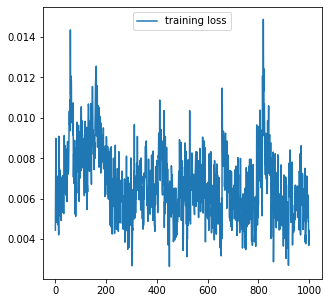

loss:   0.004427232155214531
Epoch 0/1000[*******] - Loss: 0.004014
Epoch 1/1000[*******] - Loss: 0.006570
Epoch 2/1000[*******] - Loss: 0.007883
Epoch 3/1000[*******] - Loss: 0.006405
Epoch 4/1000[*******] - Loss: 0.005430
Epoch 5/1000[*******] - Loss: 0.003253
Epoch 6/1000[*******] - Loss: 0.005327
Epoch 7/1000[*******] - Loss: 0.007248
Epoch 8/1000[*******] - Loss: 0.004738
Epoch 9/1000[*******] - Loss: 0.005198
Epoch 10/1000[*******] - Loss: 0.004956
Epoch 11/1000[*******] - Loss: 0.005849
Epoch 12/1000[*******] - Loss: 0.007674
Epoch 13/1000[*******] - Loss: 0.005832
Epoch 14/1000[*******] - Loss: 0.007039
Epoch 15/1000[*******] - Loss: 0.004989
Epoch 16/1000[*******] - Loss: 0.006198
Epoch 17/1000[*******] - Loss: 0.007732
Epoch 18/1000[*******] - Loss: 0.005807
Epoch 19/1000[*******] - Loss: 0.006729
Epoch 20/1000[*******] - Loss: 0.004794
Epoch 21/1000[*******] - Loss: 0.005121
Epoch 22/1000[*******] - Loss: 0.003919
Epoch 23/1000[*******] - Loss: 0.003893
Epoch 24/1000[*******

Epoch 202/1000[*******] - Loss: 0.007331
Epoch 203/1000[*******] - Loss: 0.007071
Epoch 204/1000[*******] - Loss: 0.005565
Epoch 205/1000[*******] - Loss: 0.006270
Epoch 206/1000[*******] - Loss: 0.007484
Epoch 207/1000[*******] - Loss: 0.006280
Epoch 208/1000[*******] - Loss: 0.004656
Epoch 209/1000[*******] - Loss: 0.006128
Epoch 210/1000[*******] - Loss: 0.005579
Epoch 211/1000[*******] - Loss: 0.007789
Epoch 212/1000[*******] - Loss: 0.007139
Epoch 213/1000[*******] - Loss: 0.007722
Epoch 214/1000[*******] - Loss: 0.006560
Epoch 215/1000[*******] - Loss: 0.005619
Epoch 216/1000[*******] - Loss: 0.006054
Epoch 217/1000[*******] - Loss: 0.006193
Epoch 218/1000[*******] - Loss: 0.006108
Epoch 219/1000[*******] - Loss: 0.005084
Epoch 220/1000[*******] - Loss: 0.005511
Epoch 221/1000[*******] - Loss: 0.006056
Epoch 222/1000[*******] - Loss: 0.005366
Epoch 223/1000[*******] - Loss: 0.006322
Epoch 224/1000[*******] - Loss: 0.005256
Epoch 225/1000[*******] - Loss: 0.007657
Epoch 226/1000[*

Epoch 402/1000[*******] - Loss: 0.006244
Epoch 403/1000[*******] - Loss: 0.006000
Epoch 404/1000[*******] - Loss: 0.005207
Epoch 405/1000[*******] - Loss: 0.003910
Epoch 406/1000[*******] - Loss: 0.005073
Epoch 407/1000[*******] - Loss: 0.006216
Epoch 408/1000[*******] - Loss: 0.005939
Epoch 409/1000[*******] - Loss: 0.005141
Epoch 410/1000[*******] - Loss: 0.004982
Epoch 411/1000[*******] - Loss: 0.006516
Epoch 412/1000[*******] - Loss: 0.004217
Epoch 413/1000[*******] - Loss: 0.004345
Epoch 414/1000[*******] - Loss: 0.005987
Epoch 415/1000[*******] - Loss: 0.007616
Epoch 416/1000[*******] - Loss: 0.006332
Epoch 417/1000[*******] - Loss: 0.004447
Epoch 418/1000[*******] - Loss: 0.004622
Epoch 419/1000[*******] - Loss: 0.007084
Epoch 420/1000[*******] - Loss: 0.004228
Epoch 421/1000[*******] - Loss: 0.005448
Epoch 422/1000[*******] - Loss: 0.004794
Epoch 423/1000[*******] - Loss: 0.006320
Epoch 424/1000[*******] - Loss: 0.006400
Epoch 425/1000[*******] - Loss: 0.008633
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.004851
Epoch 603/1000[*******] - Loss: 0.004963
Epoch 604/1000[*******] - Loss: 0.003966
Epoch 605/1000[*******] - Loss: 0.003620
Epoch 606/1000[*******] - Loss: 0.006024
Epoch 607/1000[*******] - Loss: 0.006372
Epoch 608/1000[*******] - Loss: 0.004414
Epoch 609/1000[*******] - Loss: 0.004189
Epoch 610/1000[*******] - Loss: 0.005334
Epoch 611/1000[*******] - Loss: 0.004484
Epoch 612/1000[*******] - Loss: 0.004771
Epoch 613/1000[*******] - Loss: 0.007363
Epoch 614/1000[*******] - Loss: 0.007282
Epoch 615/1000[*******] - Loss: 0.003616
Epoch 616/1000[*******] - Loss: 0.005673
Epoch 617/1000[*******] - Loss: 0.004767
Epoch 618/1000[*******] - Loss: 0.006238
Epoch 619/1000[*******] - Loss: 0.005876
Epoch 620/1000[*******] - Loss: 0.004059
Epoch 621/1000[*******] - Loss: 0.004927
Epoch 622/1000[*******] - Loss: 0.006832
Epoch 623/1000[*******] - Loss: 0.006529
Epoch 624/1000[*******] - Loss: 0.006851
Epoch 625/1000[*******] - Loss: 0.004554
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.007008
Epoch 803/1000[*******] - Loss: 0.008836
Epoch 804/1000[*******] - Loss: 0.006675
Epoch 805/1000[*******] - Loss: 0.005776
Epoch 806/1000[*******] - Loss: 0.007733
Epoch 807/1000[*******] - Loss: 0.008245
Epoch 808/1000[*******] - Loss: 0.006233
Epoch 809/1000[*******] - Loss: 0.006909
Epoch 810/1000[*******] - Loss: 0.005723
Epoch 811/1000[*******] - Loss: 0.007257
Epoch 812/1000[*******] - Loss: 0.007062
Epoch 813/1000[*******] - Loss: 0.007534
Epoch 814/1000[*******] - Loss: 0.003026
Epoch 815/1000[*******] - Loss: 0.008161
Epoch 816/1000[*******] - Loss: 0.006911
Epoch 817/1000[*******] - Loss: 0.006408
Epoch 818/1000[*******] - Loss: 0.007432
Epoch 819/1000[*******] - Loss: 0.006743
Epoch 820/1000[*******] - Loss: 0.006326
Epoch 821/1000[*******] - Loss: 0.008836
Epoch 822/1000[*******] - Loss: 0.006813
Epoch 823/1000[*******] - Loss: 0.007509
Epoch 824/1000[*******] - Loss: 0.006281
Epoch 825/1000[*******] - Loss: 0.004919
Epoch 826/1000[*

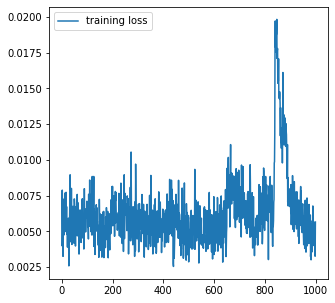

Epoch 0/1000[*******] - Loss: 0.005414
Epoch 1/1000[*******] - Loss: 0.005680
Epoch 2/1000[*******] - Loss: 0.005841
Epoch 3/1000[*******] - Loss: 0.004763
Epoch 4/1000[*******] - Loss: 0.006220
Epoch 5/1000[*******] - Loss: 0.004521
Epoch 6/1000[*******] - Loss: 0.004596
Epoch 7/1000[*******] - Loss: 0.004327
Epoch 8/1000[*******] - Loss: 0.008032
Epoch 9/1000[*******] - Loss: 0.004620
Epoch 10/1000[*******] - Loss: 0.005415
Epoch 11/1000[*******] - Loss: 0.004729
Epoch 12/1000[*******] - Loss: 0.002742
Epoch 13/1000[*******] - Loss: 0.006605
Epoch 14/1000[*******] - Loss: 0.004362
Epoch 15/1000[*******] - Loss: 0.005463
Epoch 16/1000[*******] - Loss: 0.004262
Epoch 17/1000[*******] - Loss: 0.007128
Epoch 18/1000[*******] - Loss: 0.005662
Epoch 19/1000[*******] - Loss: 0.004543
Epoch 20/1000[*******] - Loss: 0.004952
Epoch 21/1000[*******] - Loss: 0.002782
Epoch 22/1000[*******] - Loss: 0.003585
Epoch 23/1000[*******] - Loss: 0.004688
Epoch 24/1000[*******] - Loss: 0.003209
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.006372
Epoch 403/1000[*******] - Loss: 0.005724
Epoch 404/1000[*******] - Loss: 0.005564
Epoch 405/1000[*******] - Loss: 0.003473
Epoch 406/1000[*******] - Loss: 0.005451
Epoch 407/1000[*******] - Loss: 0.005125
Epoch 408/1000[*******] - Loss: 0.006298
Epoch 409/1000[*******] - Loss: 0.005717
Epoch 410/1000[*******] - Loss: 0.003930
Epoch 411/1000[*******] - Loss: 0.006295
Epoch 412/1000[*******] - Loss: 0.005325
Epoch 413/1000[*******] - Loss: 0.006823
Epoch 414/1000[*******] - Loss: 0.005632
Epoch 415/1000[*******] - Loss: 0.007240
Epoch 416/1000[*******] - Loss: 0.004615
Epoch 417/1000[*******] - Loss: 0.006238
Epoch 418/1000[*******] - Loss: 0.004376
Epoch 419/1000[*******] - Loss: 0.005621
Epoch 420/1000[*******] - Loss: 0.005851
Epoch 421/1000[*******] - Loss: 0.004354
Epoch 422/1000[*******] - Loss: 0.005396
Epoch 423/1000[*******] - Loss: 0.006561
Epoch 424/1000[*******] - Loss: 0.007294
Epoch 425/1000[*******] - Loss: 0.006624
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.004212
Epoch 603/1000[*******] - Loss: 0.005787
Epoch 604/1000[*******] - Loss: 0.003549
Epoch 605/1000[*******] - Loss: 0.005994
Epoch 606/1000[*******] - Loss: 0.005873
Epoch 607/1000[*******] - Loss: 0.005585
Epoch 608/1000[*******] - Loss: 0.005263
Epoch 609/1000[*******] - Loss: 0.005230
Epoch 610/1000[*******] - Loss: 0.005345
Epoch 611/1000[*******] - Loss: 0.005933
Epoch 612/1000[*******] - Loss: 0.004448
Epoch 613/1000[*******] - Loss: 0.005343
Epoch 614/1000[*******] - Loss: 0.005747
Epoch 615/1000[*******] - Loss: 0.003364
Epoch 616/1000[*******] - Loss: 0.006592
Epoch 617/1000[*******] - Loss: 0.004551
Epoch 618/1000[*******] - Loss: 0.006122
Epoch 619/1000[*******] - Loss: 0.005031
Epoch 620/1000[*******] - Loss: 0.004637
Epoch 621/1000[*******] - Loss: 0.005750
Epoch 622/1000[*******] - Loss: 0.004101
Epoch 623/1000[*******] - Loss: 0.004722
Epoch 624/1000[*******] - Loss: 0.005702
Epoch 625/1000[*******] - Loss: 0.003394
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.004455
Epoch 803/1000[*******] - Loss: 0.005820
Epoch 804/1000[*******] - Loss: 0.005745
Epoch 805/1000[*******] - Loss: 0.003664
Epoch 806/1000[*******] - Loss: 0.005250
Epoch 807/1000[*******] - Loss: 0.002528
Epoch 808/1000[*******] - Loss: 0.003400
Epoch 809/1000[*******] - Loss: 0.003570
Epoch 810/1000[*******] - Loss: 0.003395
Epoch 811/1000[*******] - Loss: 0.005981
Epoch 812/1000[*******] - Loss: 0.003204
Epoch 813/1000[*******] - Loss: 0.002945
Epoch 814/1000[*******] - Loss: 0.003100
Epoch 815/1000[*******] - Loss: 0.004966
Epoch 816/1000[*******] - Loss: 0.003927
Epoch 817/1000[*******] - Loss: 0.005681
Epoch 818/1000[*******] - Loss: 0.006257
Epoch 819/1000[*******] - Loss: 0.004429
Epoch 820/1000[*******] - Loss: 0.003730
Epoch 821/1000[*******] - Loss: 0.005078
Epoch 822/1000[*******] - Loss: 0.004451
Epoch 823/1000[*******] - Loss: 0.006451
Epoch 824/1000[*******] - Loss: 0.003975
Epoch 825/1000[*******] - Loss: 0.004136
Epoch 826/1000[*

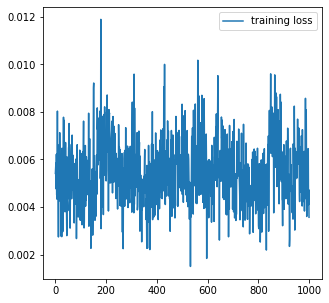

loss:   0.003567965082982394
Epoch 0/1000[*******] - Loss: 0.006625
Epoch 1/1000[*******] - Loss: 0.007628
Epoch 2/1000[*******] - Loss: 0.007854
Epoch 3/1000[*******] - Loss: 0.007808
Epoch 4/1000[*******] - Loss: 0.004986
Epoch 5/1000[*******] - Loss: 0.006806
Epoch 6/1000[*******] - Loss: 0.004400
Epoch 7/1000[*******] - Loss: 0.006073
Epoch 8/1000[*******] - Loss: 0.003562
Epoch 9/1000[*******] - Loss: 0.003072
Epoch 10/1000[*******] - Loss: 0.004353
Epoch 11/1000[*******] - Loss: 0.004942
Epoch 12/1000[*******] - Loss: 0.006047
Epoch 13/1000[*******] - Loss: 0.005008
Epoch 14/1000[*******] - Loss: 0.004844
Epoch 15/1000[*******] - Loss: 0.005793
Epoch 16/1000[*******] - Loss: 0.004514
Epoch 17/1000[*******] - Loss: 0.005331
Epoch 18/1000[*******] - Loss: 0.006289
Epoch 19/1000[*******] - Loss: 0.005162
Epoch 20/1000[*******] - Loss: 0.005105
Epoch 21/1000[*******] - Loss: 0.004292
Epoch 22/1000[*******] - Loss: 0.005480
Epoch 23/1000[*******] - Loss: 0.008601
Epoch 24/1000[*******

Epoch 202/1000[*******] - Loss: 0.004674
Epoch 203/1000[*******] - Loss: 0.006298
Epoch 204/1000[*******] - Loss: 0.004155
Epoch 205/1000[*******] - Loss: 0.007597
Epoch 206/1000[*******] - Loss: 0.008210
Epoch 207/1000[*******] - Loss: 0.008608
Epoch 208/1000[*******] - Loss: 0.005434
Epoch 209/1000[*******] - Loss: 0.007152
Epoch 210/1000[*******] - Loss: 0.006733
Epoch 211/1000[*******] - Loss: 0.007751
Epoch 212/1000[*******] - Loss: 0.006556
Epoch 213/1000[*******] - Loss: 0.006512
Epoch 214/1000[*******] - Loss: 0.005766
Epoch 215/1000[*******] - Loss: 0.003991
Epoch 216/1000[*******] - Loss: 0.007061
Epoch 217/1000[*******] - Loss: 0.005976
Epoch 218/1000[*******] - Loss: 0.006021
Epoch 219/1000[*******] - Loss: 0.007120
Epoch 220/1000[*******] - Loss: 0.004781
Epoch 221/1000[*******] - Loss: 0.005601
Epoch 222/1000[*******] - Loss: 0.006025
Epoch 223/1000[*******] - Loss: 0.006267
Epoch 224/1000[*******] - Loss: 0.003520
Epoch 225/1000[*******] - Loss: 0.007322
Epoch 226/1000[*

Epoch 402/1000[*******] - Loss: 0.003830
Epoch 403/1000[*******] - Loss: 0.005152
Epoch 404/1000[*******] - Loss: 0.002275
Epoch 405/1000[*******] - Loss: 0.005705
Epoch 406/1000[*******] - Loss: 0.006804
Epoch 407/1000[*******] - Loss: 0.006180
Epoch 408/1000[*******] - Loss: 0.007623
Epoch 409/1000[*******] - Loss: 0.005043
Epoch 410/1000[*******] - Loss: 0.004789
Epoch 411/1000[*******] - Loss: 0.004607
Epoch 412/1000[*******] - Loss: 0.003844
Epoch 413/1000[*******] - Loss: 0.005810
Epoch 414/1000[*******] - Loss: 0.003429
Epoch 415/1000[*******] - Loss: 0.006576
Epoch 416/1000[*******] - Loss: 0.007273
Epoch 417/1000[*******] - Loss: 0.005454
Epoch 418/1000[*******] - Loss: 0.005418
Epoch 419/1000[*******] - Loss: 0.004375
Epoch 420/1000[*******] - Loss: 0.006002
Epoch 421/1000[*******] - Loss: 0.005671
Epoch 422/1000[*******] - Loss: 0.005559
Epoch 423/1000[*******] - Loss: 0.004385
Epoch 424/1000[*******] - Loss: 0.006401
Epoch 425/1000[*******] - Loss: 0.004633
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.007532
Epoch 603/1000[*******] - Loss: 0.008830
Epoch 604/1000[*******] - Loss: 0.012048
Epoch 605/1000[*******] - Loss: 0.012966
Epoch 606/1000[*******] - Loss: 0.008423
Epoch 607/1000[*******] - Loss: 0.010728
Epoch 608/1000[*******] - Loss: 0.008918
Epoch 609/1000[*******] - Loss: 0.008904
Epoch 610/1000[*******] - Loss: 0.008292
Epoch 611/1000[*******] - Loss: 0.010864
Epoch 612/1000[*******] - Loss: 0.013837
Epoch 613/1000[*******] - Loss: 0.010767
Epoch 614/1000[*******] - Loss: 0.012584
Epoch 615/1000[*******] - Loss: 0.012647
Epoch 616/1000[*******] - Loss: 0.010840
Epoch 617/1000[*******] - Loss: 0.008915
Epoch 618/1000[*******] - Loss: 0.008789
Epoch 619/1000[*******] - Loss: 0.009996
Epoch 620/1000[*******] - Loss: 0.006085
Epoch 621/1000[*******] - Loss: 0.011971
Epoch 622/1000[*******] - Loss: 0.006905
Epoch 623/1000[*******] - Loss: 0.008094
Epoch 624/1000[*******] - Loss: 0.007622
Epoch 625/1000[*******] - Loss: 0.008069
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.004517
Epoch 803/1000[*******] - Loss: 0.004142
Epoch 804/1000[*******] - Loss: 0.005096
Epoch 805/1000[*******] - Loss: 0.004141
Epoch 806/1000[*******] - Loss: 0.004670
Epoch 807/1000[*******] - Loss: 0.006485
Epoch 808/1000[*******] - Loss: 0.003361
Epoch 809/1000[*******] - Loss: 0.003979
Epoch 810/1000[*******] - Loss: 0.005459
Epoch 811/1000[*******] - Loss: 0.004194
Epoch 812/1000[*******] - Loss: 0.003322
Epoch 813/1000[*******] - Loss: 0.004193
Epoch 814/1000[*******] - Loss: 0.005378
Epoch 815/1000[*******] - Loss: 0.004401
Epoch 816/1000[*******] - Loss: 0.006463
Epoch 817/1000[*******] - Loss: 0.005350
Epoch 818/1000[*******] - Loss: 0.004159
Epoch 819/1000[*******] - Loss: 0.005663
Epoch 820/1000[*******] - Loss: 0.005538
Epoch 821/1000[*******] - Loss: 0.004900
Epoch 822/1000[*******] - Loss: 0.004630
Epoch 823/1000[*******] - Loss: 0.006974
Epoch 824/1000[*******] - Loss: 0.004296
Epoch 825/1000[*******] - Loss: 0.004581
Epoch 826/1000[*

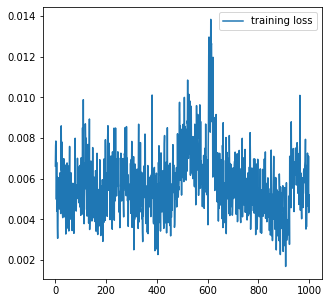

Epoch 0/1000[*******] - Loss: 0.005988
Epoch 1/1000[*******] - Loss: 0.004655
Epoch 2/1000[*******] - Loss: 0.003729
Epoch 3/1000[*******] - Loss: 0.005227
Epoch 4/1000[*******] - Loss: 0.006314
Epoch 5/1000[*******] - Loss: 0.005317
Epoch 6/1000[*******] - Loss: 0.005557
Epoch 7/1000[*******] - Loss: 0.005957
Epoch 8/1000[*******] - Loss: 0.005672
Epoch 9/1000[*******] - Loss: 0.004477
Epoch 10/1000[*******] - Loss: 0.007214
Epoch 11/1000[*******] - Loss: 0.007200
Epoch 12/1000[*******] - Loss: 0.003368
Epoch 13/1000[*******] - Loss: 0.005579
Epoch 14/1000[*******] - Loss: 0.004476
Epoch 15/1000[*******] - Loss: 0.005603
Epoch 16/1000[*******] - Loss: 0.006966
Epoch 17/1000[*******] - Loss: 0.003939
Epoch 18/1000[*******] - Loss: 0.004301
Epoch 19/1000[*******] - Loss: 0.005631
Epoch 20/1000[*******] - Loss: 0.006439
Epoch 21/1000[*******] - Loss: 0.004813
Epoch 22/1000[*******] - Loss: 0.005598
Epoch 23/1000[*******] - Loss: 0.006655
Epoch 24/1000[*******] - Loss: 0.004230
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.005309
Epoch 403/1000[*******] - Loss: 0.006990
Epoch 404/1000[*******] - Loss: 0.003736
Epoch 405/1000[*******] - Loss: 0.006891
Epoch 406/1000[*******] - Loss: 0.007708
Epoch 407/1000[*******] - Loss: 0.004168
Epoch 408/1000[*******] - Loss: 0.006183
Epoch 409/1000[*******] - Loss: 0.005169
Epoch 410/1000[*******] - Loss: 0.003136
Epoch 411/1000[*******] - Loss: 0.005344
Epoch 412/1000[*******] - Loss: 0.006430
Epoch 413/1000[*******] - Loss: 0.004080
Epoch 414/1000[*******] - Loss: 0.005668
Epoch 415/1000[*******] - Loss: 0.006906
Epoch 416/1000[*******] - Loss: 0.003726
Epoch 417/1000[*******] - Loss: 0.009032
Epoch 418/1000[*******] - Loss: 0.004876
Epoch 419/1000[*******] - Loss: 0.005147
Epoch 420/1000[*******] - Loss: 0.005727
Epoch 421/1000[*******] - Loss: 0.006101
Epoch 422/1000[*******] - Loss: 0.005706
Epoch 423/1000[*******] - Loss: 0.007615
Epoch 424/1000[*******] - Loss: 0.005296
Epoch 425/1000[*******] - Loss: 0.008642
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.005653
Epoch 603/1000[*******] - Loss: 0.007537
Epoch 604/1000[*******] - Loss: 0.008288
Epoch 605/1000[*******] - Loss: 0.006930
Epoch 606/1000[*******] - Loss: 0.006504
Epoch 607/1000[*******] - Loss: 0.005455
Epoch 608/1000[*******] - Loss: 0.005457
Epoch 609/1000[*******] - Loss: 0.006752
Epoch 610/1000[*******] - Loss: 0.006507
Epoch 611/1000[*******] - Loss: 0.004003
Epoch 612/1000[*******] - Loss: 0.005290
Epoch 613/1000[*******] - Loss: 0.004041
Epoch 614/1000[*******] - Loss: 0.008603
Epoch 615/1000[*******] - Loss: 0.005090
Epoch 616/1000[*******] - Loss: 0.005344
Epoch 617/1000[*******] - Loss: 0.007475
Epoch 618/1000[*******] - Loss: 0.006135
Epoch 619/1000[*******] - Loss: 0.006381
Epoch 620/1000[*******] - Loss: 0.004737
Epoch 621/1000[*******] - Loss: 0.005328
Epoch 622/1000[*******] - Loss: 0.006677
Epoch 623/1000[*******] - Loss: 0.005399
Epoch 624/1000[*******] - Loss: 0.003409
Epoch 625/1000[*******] - Loss: 0.007585
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.006090
Epoch 803/1000[*******] - Loss: 0.004456
Epoch 804/1000[*******] - Loss: 0.005648
Epoch 805/1000[*******] - Loss: 0.003755
Epoch 806/1000[*******] - Loss: 0.003910
Epoch 807/1000[*******] - Loss: 0.004006
Epoch 808/1000[*******] - Loss: 0.003425
Epoch 809/1000[*******] - Loss: 0.005060
Epoch 810/1000[*******] - Loss: 0.006952
Epoch 811/1000[*******] - Loss: 0.005267
Epoch 812/1000[*******] - Loss: 0.006843
Epoch 813/1000[*******] - Loss: 0.009323
Epoch 814/1000[*******] - Loss: 0.006242
Epoch 815/1000[*******] - Loss: 0.006610
Epoch 816/1000[*******] - Loss: 0.005795
Epoch 817/1000[*******] - Loss: 0.008262
Epoch 818/1000[*******] - Loss: 0.004468
Epoch 819/1000[*******] - Loss: 0.005179
Epoch 820/1000[*******] - Loss: 0.004966
Epoch 821/1000[*******] - Loss: 0.006263
Epoch 822/1000[*******] - Loss: 0.006020
Epoch 823/1000[*******] - Loss: 0.003853
Epoch 824/1000[*******] - Loss: 0.004270
Epoch 825/1000[*******] - Loss: 0.003919
Epoch 826/1000[*

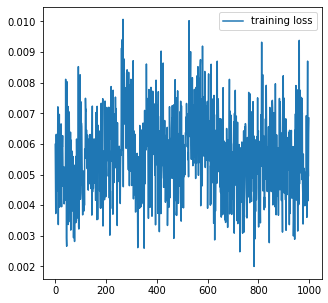

Epoch 0/1000[*******] - Loss: 0.006099
Epoch 1/1000[*******] - Loss: 0.003297
Epoch 2/1000[*******] - Loss: 0.006853
Epoch 3/1000[*******] - Loss: 0.005530
Epoch 4/1000[*******] - Loss: 0.004186
Epoch 5/1000[*******] - Loss: 0.005622
Epoch 6/1000[*******] - Loss: 0.005179
Epoch 7/1000[*******] - Loss: 0.006424
Epoch 8/1000[*******] - Loss: 0.006633
Epoch 9/1000[*******] - Loss: 0.005891
Epoch 10/1000[*******] - Loss: 0.006856
Epoch 11/1000[*******] - Loss: 0.007192
Epoch 12/1000[*******] - Loss: 0.006749
Epoch 13/1000[*******] - Loss: 0.005397
Epoch 14/1000[*******] - Loss: 0.003775
Epoch 15/1000[*******] - Loss: 0.003614
Epoch 16/1000[*******] - Loss: 0.004595
Epoch 17/1000[*******] - Loss: 0.006606
Epoch 18/1000[*******] - Loss: 0.003796
Epoch 19/1000[*******] - Loss: 0.007727
Epoch 20/1000[*******] - Loss: 0.004267
Epoch 21/1000[*******] - Loss: 0.003040
Epoch 22/1000[*******] - Loss: 0.006571
Epoch 23/1000[*******] - Loss: 0.006819
Epoch 24/1000[*******] - Loss: 0.008749
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.002410
Epoch 403/1000[*******] - Loss: 0.005336
Epoch 404/1000[*******] - Loss: 0.003482
Epoch 405/1000[*******] - Loss: 0.005635
Epoch 406/1000[*******] - Loss: 0.005739
Epoch 407/1000[*******] - Loss: 0.005410
Epoch 408/1000[*******] - Loss: 0.006787
Epoch 409/1000[*******] - Loss: 0.004386
Epoch 410/1000[*******] - Loss: 0.003019
Epoch 411/1000[*******] - Loss: 0.003473
Epoch 412/1000[*******] - Loss: 0.003217
Epoch 413/1000[*******] - Loss: 0.002408
Epoch 414/1000[*******] - Loss: 0.003814
Epoch 415/1000[*******] - Loss: 0.003513
Epoch 416/1000[*******] - Loss: 0.005404
Epoch 417/1000[*******] - Loss: 0.004034
Epoch 418/1000[*******] - Loss: 0.004753
Epoch 419/1000[*******] - Loss: 0.006392
Epoch 420/1000[*******] - Loss: 0.003784
Epoch 421/1000[*******] - Loss: 0.003876
Epoch 422/1000[*******] - Loss: 0.005419
Epoch 423/1000[*******] - Loss: 0.003647
Epoch 424/1000[*******] - Loss: 0.004427
Epoch 425/1000[*******] - Loss: 0.005913
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.002844
Epoch 603/1000[*******] - Loss: 0.005046
Epoch 604/1000[*******] - Loss: 0.003605
Epoch 605/1000[*******] - Loss: 0.004191
Epoch 606/1000[*******] - Loss: 0.004315
Epoch 607/1000[*******] - Loss: 0.005460
Epoch 608/1000[*******] - Loss: 0.004024
Epoch 609/1000[*******] - Loss: 0.003318
Epoch 610/1000[*******] - Loss: 0.003750
Epoch 611/1000[*******] - Loss: 0.005368
Epoch 612/1000[*******] - Loss: 0.004312
Epoch 613/1000[*******] - Loss: 0.004249
Epoch 614/1000[*******] - Loss: 0.002185
Epoch 615/1000[*******] - Loss: 0.006228
Epoch 616/1000[*******] - Loss: 0.005691
Epoch 617/1000[*******] - Loss: 0.003478
Epoch 618/1000[*******] - Loss: 0.006399
Epoch 619/1000[*******] - Loss: 0.005450
Epoch 620/1000[*******] - Loss: 0.005278
Epoch 621/1000[*******] - Loss: 0.005922
Epoch 622/1000[*******] - Loss: 0.005927
Epoch 623/1000[*******] - Loss: 0.005745
Epoch 624/1000[*******] - Loss: 0.003775
Epoch 625/1000[*******] - Loss: 0.005718
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.002690
Epoch 803/1000[*******] - Loss: 0.005409
Epoch 804/1000[*******] - Loss: 0.004496
Epoch 805/1000[*******] - Loss: 0.003727
Epoch 806/1000[*******] - Loss: 0.004568
Epoch 807/1000[*******] - Loss: 0.004185
Epoch 808/1000[*******] - Loss: 0.003687
Epoch 809/1000[*******] - Loss: 0.003645
Epoch 810/1000[*******] - Loss: 0.002742
Epoch 811/1000[*******] - Loss: 0.002265
Epoch 812/1000[*******] - Loss: 0.004295
Epoch 813/1000[*******] - Loss: 0.003262
Epoch 814/1000[*******] - Loss: 0.003340
Epoch 815/1000[*******] - Loss: 0.004374
Epoch 816/1000[*******] - Loss: 0.003787
Epoch 817/1000[*******] - Loss: 0.003520
Epoch 818/1000[*******] - Loss: 0.005085
Epoch 819/1000[*******] - Loss: 0.003419
Epoch 820/1000[*******] - Loss: 0.004084
Epoch 821/1000[*******] - Loss: 0.005482
Epoch 822/1000[*******] - Loss: 0.003988
Epoch 823/1000[*******] - Loss: 0.003656
Epoch 824/1000[*******] - Loss: 0.003899
Epoch 825/1000[*******] - Loss: 0.002707
Epoch 826/1000[*

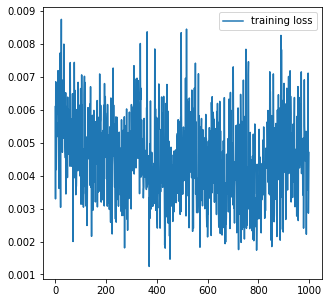

Epoch 0/1000[*******] - Loss: 0.005916
Epoch 1/1000[*******] - Loss: 0.006197
Epoch 2/1000[*******] - Loss: 0.003896
Epoch 3/1000[*******] - Loss: 0.004263
Epoch 4/1000[*******] - Loss: 0.004263
Epoch 5/1000[*******] - Loss: 0.003545
Epoch 6/1000[*******] - Loss: 0.004409
Epoch 7/1000[*******] - Loss: 0.004294
Epoch 8/1000[*******] - Loss: 0.003972
Epoch 9/1000[*******] - Loss: 0.004217
Epoch 10/1000[*******] - Loss: 0.004345
Epoch 11/1000[*******] - Loss: 0.004484
Epoch 12/1000[*******] - Loss: 0.004505
Epoch 13/1000[*******] - Loss: 0.004512
Epoch 14/1000[*******] - Loss: 0.003063
Epoch 15/1000[*******] - Loss: 0.003734
Epoch 16/1000[*******] - Loss: 0.005016
Epoch 17/1000[*******] - Loss: 0.004690
Epoch 18/1000[*******] - Loss: 0.005256
Epoch 19/1000[*******] - Loss: 0.004615
Epoch 20/1000[*******] - Loss: 0.003607
Epoch 21/1000[*******] - Loss: 0.002925
Epoch 22/1000[*******] - Loss: 0.004019
Epoch 23/1000[*******] - Loss: 0.003649
Epoch 24/1000[*******] - Loss: 0.003709
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.004449
Epoch 403/1000[*******] - Loss: 0.003740
Epoch 404/1000[*******] - Loss: 0.001931
Epoch 405/1000[*******] - Loss: 0.002305
Epoch 406/1000[*******] - Loss: 0.003819
Epoch 407/1000[*******] - Loss: 0.005910
Epoch 408/1000[*******] - Loss: 0.002162
Epoch 409/1000[*******] - Loss: 0.003217
Epoch 410/1000[*******] - Loss: 0.004439
Epoch 411/1000[*******] - Loss: 0.005415
Epoch 412/1000[*******] - Loss: 0.003061
Epoch 413/1000[*******] - Loss: 0.003127
Epoch 414/1000[*******] - Loss: 0.004115
Epoch 415/1000[*******] - Loss: 0.003872
Epoch 416/1000[*******] - Loss: 0.003884
Epoch 417/1000[*******] - Loss: 0.002906
Epoch 418/1000[*******] - Loss: 0.003647
Epoch 419/1000[*******] - Loss: 0.003688
Epoch 420/1000[*******] - Loss: 0.001437
Epoch 421/1000[*******] - Loss: 0.002427
Epoch 422/1000[*******] - Loss: 0.003716
Epoch 423/1000[*******] - Loss: 0.005277
Epoch 424/1000[*******] - Loss: 0.002506
Epoch 425/1000[*******] - Loss: 0.004928
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.005201
Epoch 603/1000[*******] - Loss: 0.005445
Epoch 604/1000[*******] - Loss: 0.003014
Epoch 605/1000[*******] - Loss: 0.005317
Epoch 606/1000[*******] - Loss: 0.003075
Epoch 607/1000[*******] - Loss: 0.002800
Epoch 608/1000[*******] - Loss: 0.004581
Epoch 609/1000[*******] - Loss: 0.005263
Epoch 610/1000[*******] - Loss: 0.003444
Epoch 611/1000[*******] - Loss: 0.004143
Epoch 612/1000[*******] - Loss: 0.004690
Epoch 613/1000[*******] - Loss: 0.003476
Epoch 614/1000[*******] - Loss: 0.003340
Epoch 615/1000[*******] - Loss: 0.004300
Epoch 616/1000[*******] - Loss: 0.005231
Epoch 617/1000[*******] - Loss: 0.004782
Epoch 618/1000[*******] - Loss: 0.004522
Epoch 619/1000[*******] - Loss: 0.005521
Epoch 620/1000[*******] - Loss: 0.003074
Epoch 621/1000[*******] - Loss: 0.003317
Epoch 622/1000[*******] - Loss: 0.004921
Epoch 623/1000[*******] - Loss: 0.004446
Epoch 624/1000[*******] - Loss: 0.002789
Epoch 625/1000[*******] - Loss: 0.005113
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.005390
Epoch 803/1000[*******] - Loss: 0.004663
Epoch 804/1000[*******] - Loss: 0.002294
Epoch 805/1000[*******] - Loss: 0.004333
Epoch 806/1000[*******] - Loss: 0.003931
Epoch 807/1000[*******] - Loss: 0.003374
Epoch 808/1000[*******] - Loss: 0.003087
Epoch 809/1000[*******] - Loss: 0.002535
Epoch 810/1000[*******] - Loss: 0.003855
Epoch 811/1000[*******] - Loss: 0.004774
Epoch 812/1000[*******] - Loss: 0.002448
Epoch 813/1000[*******] - Loss: 0.002814
Epoch 814/1000[*******] - Loss: 0.004138
Epoch 815/1000[*******] - Loss: 0.003214
Epoch 816/1000[*******] - Loss: 0.004250
Epoch 817/1000[*******] - Loss: 0.003734
Epoch 818/1000[*******] - Loss: 0.003681
Epoch 819/1000[*******] - Loss: 0.003429
Epoch 820/1000[*******] - Loss: 0.003760
Epoch 821/1000[*******] - Loss: 0.004913
Epoch 822/1000[*******] - Loss: 0.002693
Epoch 823/1000[*******] - Loss: 0.003623
Epoch 824/1000[*******] - Loss: 0.004700
Epoch 825/1000[*******] - Loss: 0.004958
Epoch 826/1000[*

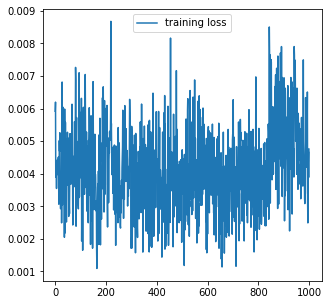

Epoch 0/1000[*******] - Loss: 0.005838
Epoch 1/1000[*******] - Loss: 0.004007
Epoch 2/1000[*******] - Loss: 0.003965
Epoch 3/1000[*******] - Loss: 0.003661
Epoch 4/1000[*******] - Loss: 0.002682
Epoch 5/1000[*******] - Loss: 0.004419
Epoch 6/1000[*******] - Loss: 0.006382
Epoch 7/1000[*******] - Loss: 0.002836
Epoch 8/1000[*******] - Loss: 0.003850
Epoch 9/1000[*******] - Loss: 0.003384
Epoch 10/1000[*******] - Loss: 0.005021
Epoch 11/1000[*******] - Loss: 0.004437
Epoch 12/1000[*******] - Loss: 0.005951
Epoch 13/1000[*******] - Loss: 0.003425
Epoch 14/1000[*******] - Loss: 0.006163
Epoch 15/1000[*******] - Loss: 0.005916
Epoch 16/1000[*******] - Loss: 0.002580
Epoch 17/1000[*******] - Loss: 0.004733
Epoch 18/1000[*******] - Loss: 0.003187
Epoch 19/1000[*******] - Loss: 0.004450
Epoch 20/1000[*******] - Loss: 0.002853
Epoch 21/1000[*******] - Loss: 0.007722
Epoch 22/1000[*******] - Loss: 0.003976
Epoch 23/1000[*******] - Loss: 0.003602
Epoch 24/1000[*******] - Loss: 0.003659
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.004778
Epoch 403/1000[*******] - Loss: 0.003242
Epoch 404/1000[*******] - Loss: 0.005006
Epoch 405/1000[*******] - Loss: 0.004943
Epoch 406/1000[*******] - Loss: 0.003862
Epoch 407/1000[*******] - Loss: 0.001293
Epoch 408/1000[*******] - Loss: 0.000844
Epoch 409/1000[*******] - Loss: 0.003472
Epoch 410/1000[*******] - Loss: 0.002751
Epoch 411/1000[*******] - Loss: 0.003304
Epoch 412/1000[*******] - Loss: 0.002441
Epoch 413/1000[*******] - Loss: 0.004512
Epoch 414/1000[*******] - Loss: 0.001927
Epoch 415/1000[*******] - Loss: 0.001570
Epoch 416/1000[*******] - Loss: 0.004079
Epoch 417/1000[*******] - Loss: 0.003675
Epoch 418/1000[*******] - Loss: 0.004773
Epoch 419/1000[*******] - Loss: 0.004119
Epoch 420/1000[*******] - Loss: 0.003520
Epoch 421/1000[*******] - Loss: 0.004872
Epoch 422/1000[*******] - Loss: 0.001760
Epoch 423/1000[*******] - Loss: 0.003492
Epoch 424/1000[*******] - Loss: 0.003276
Epoch 425/1000[*******] - Loss: 0.001888
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.003339
Epoch 603/1000[*******] - Loss: 0.004733
Epoch 604/1000[*******] - Loss: 0.003654
Epoch 605/1000[*******] - Loss: 0.003025
Epoch 606/1000[*******] - Loss: 0.003145
Epoch 607/1000[*******] - Loss: 0.004325
Epoch 608/1000[*******] - Loss: 0.005099
Epoch 609/1000[*******] - Loss: 0.003700
Epoch 610/1000[*******] - Loss: 0.004153
Epoch 611/1000[*******] - Loss: 0.005989
Epoch 612/1000[*******] - Loss: 0.004259
Epoch 613/1000[*******] - Loss: 0.003771
Epoch 614/1000[*******] - Loss: 0.003877
Epoch 615/1000[*******] - Loss: 0.002851
Epoch 616/1000[*******] - Loss: 0.003163
Epoch 617/1000[*******] - Loss: 0.002843
Epoch 618/1000[*******] - Loss: 0.005663
Epoch 619/1000[*******] - Loss: 0.004554
Epoch 620/1000[*******] - Loss: 0.003144
Epoch 621/1000[*******] - Loss: 0.002789
Epoch 622/1000[*******] - Loss: 0.002437
Epoch 623/1000[*******] - Loss: 0.004221
Epoch 624/1000[*******] - Loss: 0.005848
Epoch 625/1000[*******] - Loss: 0.006340
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.002374
Epoch 803/1000[*******] - Loss: 0.002065
Epoch 804/1000[*******] - Loss: 0.005208
Epoch 805/1000[*******] - Loss: 0.005754
Epoch 806/1000[*******] - Loss: 0.003828
Epoch 807/1000[*******] - Loss: 0.003277
Epoch 808/1000[*******] - Loss: 0.003739
Epoch 809/1000[*******] - Loss: 0.002650
Epoch 810/1000[*******] - Loss: 0.001939
Epoch 811/1000[*******] - Loss: 0.004540
Epoch 812/1000[*******] - Loss: 0.003143
Epoch 813/1000[*******] - Loss: 0.004067
Epoch 814/1000[*******] - Loss: 0.002367
Epoch 815/1000[*******] - Loss: 0.005257
Epoch 816/1000[*******] - Loss: 0.003877
Epoch 817/1000[*******] - Loss: 0.002323
Epoch 818/1000[*******] - Loss: 0.001897
Epoch 819/1000[*******] - Loss: 0.004147
Epoch 820/1000[*******] - Loss: 0.002925
Epoch 821/1000[*******] - Loss: 0.002276
Epoch 822/1000[*******] - Loss: 0.004191
Epoch 823/1000[*******] - Loss: 0.003524
Epoch 824/1000[*******] - Loss: 0.004543
Epoch 825/1000[*******] - Loss: 0.006196
Epoch 826/1000[*

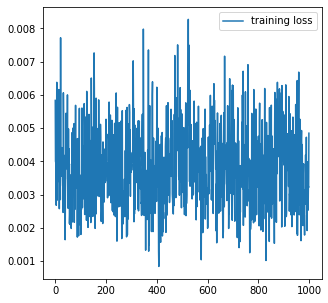

Epoch 0/1000[*******] - Loss: 0.005097
Epoch 1/1000[*******] - Loss: 0.002194
Epoch 2/1000[*******] - Loss: 0.004957
Epoch 3/1000[*******] - Loss: 0.004329
Epoch 4/1000[*******] - Loss: 0.005050
Epoch 5/1000[*******] - Loss: 0.004708
Epoch 6/1000[*******] - Loss: 0.006723
Epoch 7/1000[*******] - Loss: 0.003431
Epoch 8/1000[*******] - Loss: 0.005832
Epoch 9/1000[*******] - Loss: 0.004922
Epoch 10/1000[*******] - Loss: 0.002595
Epoch 11/1000[*******] - Loss: 0.004131
Epoch 12/1000[*******] - Loss: 0.003249
Epoch 13/1000[*******] - Loss: 0.004122
Epoch 14/1000[*******] - Loss: 0.003021
Epoch 15/1000[*******] - Loss: 0.004364
Epoch 16/1000[*******] - Loss: 0.002587
Epoch 17/1000[*******] - Loss: 0.004605
Epoch 18/1000[*******] - Loss: 0.004745
Epoch 19/1000[*******] - Loss: 0.003763
Epoch 20/1000[*******] - Loss: 0.005199
Epoch 21/1000[*******] - Loss: 0.002902
Epoch 22/1000[*******] - Loss: 0.005020
Epoch 23/1000[*******] - Loss: 0.004484
Epoch 24/1000[*******] - Loss: 0.004060
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.005238
Epoch 403/1000[*******] - Loss: 0.003644
Epoch 404/1000[*******] - Loss: 0.002380
Epoch 405/1000[*******] - Loss: 0.003419
Epoch 406/1000[*******] - Loss: 0.003374
Epoch 407/1000[*******] - Loss: 0.003229
Epoch 408/1000[*******] - Loss: 0.002514
Epoch 409/1000[*******] - Loss: 0.002378
Epoch 410/1000[*******] - Loss: 0.003431
Epoch 411/1000[*******] - Loss: 0.002402
Epoch 412/1000[*******] - Loss: 0.002819
Epoch 413/1000[*******] - Loss: 0.004541
Epoch 414/1000[*******] - Loss: 0.007347
Epoch 415/1000[*******] - Loss: 0.003740
Epoch 416/1000[*******] - Loss: 0.004964
Epoch 417/1000[*******] - Loss: 0.003264
Epoch 418/1000[*******] - Loss: 0.003988
Epoch 419/1000[*******] - Loss: 0.002077
Epoch 420/1000[*******] - Loss: 0.002050
Epoch 421/1000[*******] - Loss: 0.005216
Epoch 422/1000[*******] - Loss: 0.001867
Epoch 423/1000[*******] - Loss: 0.004376
Epoch 424/1000[*******] - Loss: 0.002842
Epoch 425/1000[*******] - Loss: 0.003210
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.003235
Epoch 603/1000[*******] - Loss: 0.008400
Epoch 604/1000[*******] - Loss: 0.005105
Epoch 605/1000[*******] - Loss: 0.003094
Epoch 606/1000[*******] - Loss: 0.004374
Epoch 607/1000[*******] - Loss: 0.003183
Epoch 608/1000[*******] - Loss: 0.003933
Epoch 609/1000[*******] - Loss: 0.004856
Epoch 610/1000[*******] - Loss: 0.005490
Epoch 611/1000[*******] - Loss: 0.005207
Epoch 612/1000[*******] - Loss: 0.002476
Epoch 613/1000[*******] - Loss: 0.006257
Epoch 614/1000[*******] - Loss: 0.007238
Epoch 615/1000[*******] - Loss: 0.006399
Epoch 616/1000[*******] - Loss: 0.003789
Epoch 617/1000[*******] - Loss: 0.005650
Epoch 618/1000[*******] - Loss: 0.002771
Epoch 619/1000[*******] - Loss: 0.004156
Epoch 620/1000[*******] - Loss: 0.004052
Epoch 621/1000[*******] - Loss: 0.004388
Epoch 622/1000[*******] - Loss: 0.006782
Epoch 623/1000[*******] - Loss: 0.001790
Epoch 624/1000[*******] - Loss: 0.004219
Epoch 625/1000[*******] - Loss: 0.003507
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.004380
Epoch 803/1000[*******] - Loss: 0.006514
Epoch 804/1000[*******] - Loss: 0.007111
Epoch 805/1000[*******] - Loss: 0.003910
Epoch 806/1000[*******] - Loss: 0.003763
Epoch 807/1000[*******] - Loss: 0.003996
Epoch 808/1000[*******] - Loss: 0.004567
Epoch 809/1000[*******] - Loss: 0.004040
Epoch 810/1000[*******] - Loss: 0.004406
Epoch 811/1000[*******] - Loss: 0.003670
Epoch 812/1000[*******] - Loss: 0.003795
Epoch 813/1000[*******] - Loss: 0.003114
Epoch 814/1000[*******] - Loss: 0.003694
Epoch 815/1000[*******] - Loss: 0.002324
Epoch 816/1000[*******] - Loss: 0.004544
Epoch 817/1000[*******] - Loss: 0.007315
Epoch 818/1000[*******] - Loss: 0.004466
Epoch 819/1000[*******] - Loss: 0.005834
Epoch 820/1000[*******] - Loss: 0.006228
Epoch 821/1000[*******] - Loss: 0.003317
Epoch 822/1000[*******] - Loss: 0.003528
Epoch 823/1000[*******] - Loss: 0.005151
Epoch 824/1000[*******] - Loss: 0.002710
Epoch 825/1000[*******] - Loss: 0.004963
Epoch 826/1000[*

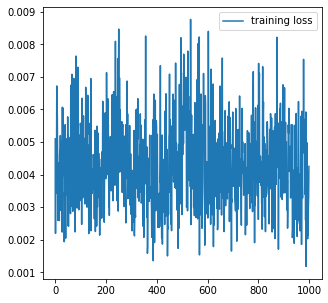

Epoch 0/1000[*******] - Loss: 0.001448
Epoch 1/1000[*******] - Loss: 0.003442
Epoch 2/1000[*******] - Loss: 0.004150
Epoch 3/1000[*******] - Loss: 0.002348
Epoch 4/1000[*******] - Loss: 0.005207
Epoch 5/1000[*******] - Loss: 0.002520
Epoch 6/1000[*******] - Loss: 0.003822
Epoch 7/1000[*******] - Loss: 0.002280
Epoch 8/1000[*******] - Loss: 0.002797
Epoch 9/1000[*******] - Loss: 0.003302
Epoch 10/1000[*******] - Loss: 0.002826
Epoch 11/1000[*******] - Loss: 0.002279
Epoch 12/1000[*******] - Loss: 0.003564
Epoch 13/1000[*******] - Loss: 0.002575
Epoch 14/1000[*******] - Loss: 0.003045
Epoch 15/1000[*******] - Loss: 0.001444
Epoch 16/1000[*******] - Loss: 0.003561
Epoch 17/1000[*******] - Loss: 0.003568
Epoch 18/1000[*******] - Loss: 0.004646
Epoch 19/1000[*******] - Loss: 0.003587
Epoch 20/1000[*******] - Loss: 0.002759
Epoch 21/1000[*******] - Loss: 0.003701
Epoch 22/1000[*******] - Loss: 0.003295
Epoch 23/1000[*******] - Loss: 0.003152
Epoch 24/1000[*******] - Loss: 0.006264
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.004160
Epoch 403/1000[*******] - Loss: 0.003435
Epoch 404/1000[*******] - Loss: 0.005856
Epoch 405/1000[*******] - Loss: 0.004967
Epoch 406/1000[*******] - Loss: 0.003435
Epoch 407/1000[*******] - Loss: 0.005223
Epoch 408/1000[*******] - Loss: 0.004225
Epoch 409/1000[*******] - Loss: 0.003260
Epoch 410/1000[*******] - Loss: 0.003786
Epoch 411/1000[*******] - Loss: 0.004749
Epoch 412/1000[*******] - Loss: 0.004249
Epoch 413/1000[*******] - Loss: 0.004030
Epoch 414/1000[*******] - Loss: 0.003145
Epoch 415/1000[*******] - Loss: 0.004697
Epoch 416/1000[*******] - Loss: 0.003676
Epoch 417/1000[*******] - Loss: 0.006255
Epoch 418/1000[*******] - Loss: 0.003269
Epoch 419/1000[*******] - Loss: 0.004171
Epoch 420/1000[*******] - Loss: 0.004669
Epoch 421/1000[*******] - Loss: 0.003305
Epoch 422/1000[*******] - Loss: 0.004263
Epoch 423/1000[*******] - Loss: 0.004669
Epoch 424/1000[*******] - Loss: 0.003092
Epoch 425/1000[*******] - Loss: 0.005098
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.005979
Epoch 603/1000[*******] - Loss: 0.005511
Epoch 604/1000[*******] - Loss: 0.003876
Epoch 605/1000[*******] - Loss: 0.002905
Epoch 606/1000[*******] - Loss: 0.002107
Epoch 607/1000[*******] - Loss: 0.004256
Epoch 608/1000[*******] - Loss: 0.001640
Epoch 609/1000[*******] - Loss: 0.004415
Epoch 610/1000[*******] - Loss: 0.003817
Epoch 611/1000[*******] - Loss: 0.002161
Epoch 612/1000[*******] - Loss: 0.004253
Epoch 613/1000[*******] - Loss: 0.004434
Epoch 614/1000[*******] - Loss: 0.003952
Epoch 615/1000[*******] - Loss: 0.003655
Epoch 616/1000[*******] - Loss: 0.005860
Epoch 617/1000[*******] - Loss: 0.004480
Epoch 618/1000[*******] - Loss: 0.003215
Epoch 619/1000[*******] - Loss: 0.002800
Epoch 620/1000[*******] - Loss: 0.004566
Epoch 621/1000[*******] - Loss: 0.004007
Epoch 622/1000[*******] - Loss: 0.002717
Epoch 623/1000[*******] - Loss: 0.004310
Epoch 624/1000[*******] - Loss: 0.003173
Epoch 625/1000[*******] - Loss: 0.005724
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.004285
Epoch 803/1000[*******] - Loss: 0.003239
Epoch 804/1000[*******] - Loss: 0.006687
Epoch 805/1000[*******] - Loss: 0.002728
Epoch 806/1000[*******] - Loss: 0.002990
Epoch 807/1000[*******] - Loss: 0.003476
Epoch 808/1000[*******] - Loss: 0.003300
Epoch 809/1000[*******] - Loss: 0.002996
Epoch 810/1000[*******] - Loss: 0.006040
Epoch 811/1000[*******] - Loss: 0.003262
Epoch 812/1000[*******] - Loss: 0.004422
Epoch 813/1000[*******] - Loss: 0.005233
Epoch 814/1000[*******] - Loss: 0.003360
Epoch 815/1000[*******] - Loss: 0.006014
Epoch 816/1000[*******] - Loss: 0.004477
Epoch 817/1000[*******] - Loss: 0.006310
Epoch 818/1000[*******] - Loss: 0.003898
Epoch 819/1000[*******] - Loss: 0.004095
Epoch 820/1000[*******] - Loss: 0.004388
Epoch 821/1000[*******] - Loss: 0.003844
Epoch 822/1000[*******] - Loss: 0.008014
Epoch 823/1000[*******] - Loss: 0.003717
Epoch 824/1000[*******] - Loss: 0.004784
Epoch 825/1000[*******] - Loss: 0.004012
Epoch 826/1000[*

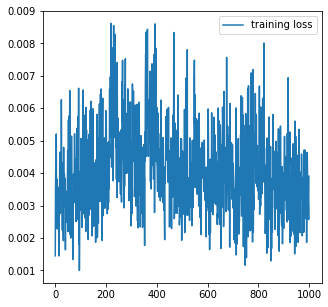

Epoch 0/1000[*******] - Loss: 0.003261
Epoch 1/1000[*******] - Loss: 0.004706
Epoch 2/1000[*******] - Loss: 0.005461
Epoch 3/1000[*******] - Loss: 0.005904
Epoch 4/1000[*******] - Loss: 0.005056
Epoch 5/1000[*******] - Loss: 0.002858
Epoch 6/1000[*******] - Loss: 0.004260
Epoch 7/1000[*******] - Loss: 0.004178
Epoch 8/1000[*******] - Loss: 0.003943
Epoch 9/1000[*******] - Loss: 0.001732
Epoch 10/1000[*******] - Loss: 0.006212
Epoch 11/1000[*******] - Loss: 0.005197
Epoch 12/1000[*******] - Loss: 0.006108
Epoch 13/1000[*******] - Loss: 0.004103
Epoch 14/1000[*******] - Loss: 0.005592
Epoch 15/1000[*******] - Loss: 0.006093
Epoch 16/1000[*******] - Loss: 0.005021
Epoch 17/1000[*******] - Loss: 0.005877
Epoch 18/1000[*******] - Loss: 0.004036
Epoch 19/1000[*******] - Loss: 0.003083
Epoch 20/1000[*******] - Loss: 0.002694
Epoch 21/1000[*******] - Loss: 0.003005
Epoch 22/1000[*******] - Loss: 0.004820
Epoch 23/1000[*******] - Loss: 0.003278
Epoch 24/1000[*******] - Loss: 0.003987
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.005536
Epoch 403/1000[*******] - Loss: 0.003978
Epoch 404/1000[*******] - Loss: 0.006521
Epoch 405/1000[*******] - Loss: 0.007014
Epoch 406/1000[*******] - Loss: 0.002951
Epoch 407/1000[*******] - Loss: 0.004402
Epoch 408/1000[*******] - Loss: 0.007918
Epoch 409/1000[*******] - Loss: 0.008125
Epoch 410/1000[*******] - Loss: 0.006414
Epoch 411/1000[*******] - Loss: 0.003659
Epoch 412/1000[*******] - Loss: 0.004511
Epoch 413/1000[*******] - Loss: 0.003771
Epoch 414/1000[*******] - Loss: 0.002719
Epoch 415/1000[*******] - Loss: 0.005079
Epoch 416/1000[*******] - Loss: 0.004383
Epoch 417/1000[*******] - Loss: 0.006621
Epoch 418/1000[*******] - Loss: 0.002655
Epoch 419/1000[*******] - Loss: 0.005984
Epoch 420/1000[*******] - Loss: 0.003796
Epoch 421/1000[*******] - Loss: 0.004125
Epoch 422/1000[*******] - Loss: 0.002878
Epoch 423/1000[*******] - Loss: 0.005397
Epoch 424/1000[*******] - Loss: 0.002046
Epoch 425/1000[*******] - Loss: 0.005194
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.004008
Epoch 603/1000[*******] - Loss: 0.003081
Epoch 604/1000[*******] - Loss: 0.004898
Epoch 605/1000[*******] - Loss: 0.003580
Epoch 606/1000[*******] - Loss: 0.003565
Epoch 607/1000[*******] - Loss: 0.003428
Epoch 608/1000[*******] - Loss: 0.005003
Epoch 609/1000[*******] - Loss: 0.004313
Epoch 610/1000[*******] - Loss: 0.004270
Epoch 611/1000[*******] - Loss: 0.001950
Epoch 612/1000[*******] - Loss: 0.001691
Epoch 613/1000[*******] - Loss: 0.003471
Epoch 614/1000[*******] - Loss: 0.003974
Epoch 615/1000[*******] - Loss: 0.004714
Epoch 616/1000[*******] - Loss: 0.003798
Epoch 617/1000[*******] - Loss: 0.006118
Epoch 618/1000[*******] - Loss: 0.002980
Epoch 619/1000[*******] - Loss: 0.004545
Epoch 620/1000[*******] - Loss: 0.004683
Epoch 621/1000[*******] - Loss: 0.001392
Epoch 622/1000[*******] - Loss: 0.003349
Epoch 623/1000[*******] - Loss: 0.003717
Epoch 624/1000[*******] - Loss: 0.004732
Epoch 625/1000[*******] - Loss: 0.002496
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.004338
Epoch 803/1000[*******] - Loss: 0.002624
Epoch 804/1000[*******] - Loss: 0.003438
Epoch 805/1000[*******] - Loss: 0.003689
Epoch 806/1000[*******] - Loss: 0.002741
Epoch 807/1000[*******] - Loss: 0.005741
Epoch 808/1000[*******] - Loss: 0.004428
Epoch 809/1000[*******] - Loss: 0.002091
Epoch 810/1000[*******] - Loss: 0.002339
Epoch 811/1000[*******] - Loss: 0.004054
Epoch 812/1000[*******] - Loss: 0.004427
Epoch 813/1000[*******] - Loss: 0.003842
Epoch 814/1000[*******] - Loss: 0.002611
Epoch 815/1000[*******] - Loss: 0.002656
Epoch 816/1000[*******] - Loss: 0.002639
Epoch 817/1000[*******] - Loss: 0.004368
Epoch 818/1000[*******] - Loss: 0.003688
Epoch 819/1000[*******] - Loss: 0.003859
Epoch 820/1000[*******] - Loss: 0.002671
Epoch 821/1000[*******] - Loss: 0.002073
Epoch 822/1000[*******] - Loss: 0.004115
Epoch 823/1000[*******] - Loss: 0.003633
Epoch 824/1000[*******] - Loss: 0.003025
Epoch 825/1000[*******] - Loss: 0.001963
Epoch 826/1000[*

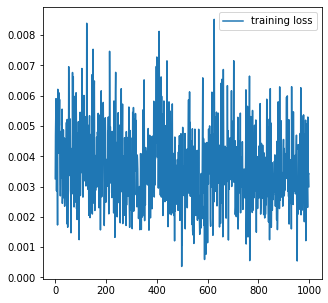

loss:   0.002997043940126283
Epoch 0/1000[*******] - Loss: 0.002710
Epoch 1/1000[*******] - Loss: 0.003315
Epoch 2/1000[*******] - Loss: 0.002483
Epoch 3/1000[*******] - Loss: 0.006151
Epoch 4/1000[*******] - Loss: 0.003352
Epoch 5/1000[*******] - Loss: 0.005675
Epoch 6/1000[*******] - Loss: 0.001309
Epoch 7/1000[*******] - Loss: 0.002856
Epoch 8/1000[*******] - Loss: 0.005870
Epoch 9/1000[*******] - Loss: 0.003823
Epoch 10/1000[*******] - Loss: 0.004417
Epoch 11/1000[*******] - Loss: 0.002438
Epoch 12/1000[*******] - Loss: 0.000676
Epoch 13/1000[*******] - Loss: 0.004262
Epoch 14/1000[*******] - Loss: 0.002210
Epoch 15/1000[*******] - Loss: 0.003529
Epoch 16/1000[*******] - Loss: 0.001531
Epoch 17/1000[*******] - Loss: 0.002168
Epoch 18/1000[*******] - Loss: 0.003707
Epoch 19/1000[*******] - Loss: 0.003315
Epoch 20/1000[*******] - Loss: 0.002461
Epoch 21/1000[*******] - Loss: 0.003088
Epoch 22/1000[*******] - Loss: 0.002814
Epoch 23/1000[*******] - Loss: 0.004067
Epoch 24/1000[*******

Epoch 202/1000[*******] - Loss: 0.006501
Epoch 203/1000[*******] - Loss: 0.005921
Epoch 204/1000[*******] - Loss: 0.002375
Epoch 205/1000[*******] - Loss: 0.006660
Epoch 206/1000[*******] - Loss: 0.002382
Epoch 207/1000[*******] - Loss: 0.001884
Epoch 208/1000[*******] - Loss: 0.002160
Epoch 209/1000[*******] - Loss: 0.004756
Epoch 210/1000[*******] - Loss: 0.004787
Epoch 211/1000[*******] - Loss: 0.002014
Epoch 212/1000[*******] - Loss: 0.003063
Epoch 213/1000[*******] - Loss: 0.002553
Epoch 214/1000[*******] - Loss: 0.003806
Epoch 215/1000[*******] - Loss: 0.001618
Epoch 216/1000[*******] - Loss: 0.006576
Epoch 217/1000[*******] - Loss: 0.004174
Epoch 218/1000[*******] - Loss: 0.003960
Epoch 219/1000[*******] - Loss: 0.004101
Epoch 220/1000[*******] - Loss: 0.003425
Epoch 221/1000[*******] - Loss: 0.004354
Epoch 222/1000[*******] - Loss: 0.003742
Epoch 223/1000[*******] - Loss: 0.001154
Epoch 224/1000[*******] - Loss: 0.002924
Epoch 225/1000[*******] - Loss: 0.002710
Epoch 226/1000[*

Epoch 402/1000[*******] - Loss: 0.001683
Epoch 403/1000[*******] - Loss: 0.002260
Epoch 404/1000[*******] - Loss: 0.005596
Epoch 405/1000[*******] - Loss: 0.005235
Epoch 406/1000[*******] - Loss: 0.004385
Epoch 407/1000[*******] - Loss: 0.003604
Epoch 408/1000[*******] - Loss: 0.003571
Epoch 409/1000[*******] - Loss: 0.002412
Epoch 410/1000[*******] - Loss: 0.004666
Epoch 411/1000[*******] - Loss: 0.003096
Epoch 412/1000[*******] - Loss: 0.005053
Epoch 413/1000[*******] - Loss: 0.004668
Epoch 414/1000[*******] - Loss: 0.004484
Epoch 415/1000[*******] - Loss: 0.004572
Epoch 416/1000[*******] - Loss: 0.005974
Epoch 417/1000[*******] - Loss: 0.005975
Epoch 418/1000[*******] - Loss: 0.003604
Epoch 419/1000[*******] - Loss: 0.002883
Epoch 420/1000[*******] - Loss: 0.005990
Epoch 421/1000[*******] - Loss: 0.004441
Epoch 422/1000[*******] - Loss: 0.006757
Epoch 423/1000[*******] - Loss: 0.003223
Epoch 424/1000[*******] - Loss: 0.002928
Epoch 425/1000[*******] - Loss: 0.003568
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.001666
Epoch 603/1000[*******] - Loss: 0.005234
Epoch 604/1000[*******] - Loss: 0.004267
Epoch 605/1000[*******] - Loss: 0.003476
Epoch 606/1000[*******] - Loss: 0.002183
Epoch 607/1000[*******] - Loss: 0.001046
Epoch 608/1000[*******] - Loss: 0.003273
Epoch 609/1000[*******] - Loss: 0.005130
Epoch 610/1000[*******] - Loss: 0.001144
Epoch 611/1000[*******] - Loss: 0.002177
Epoch 612/1000[*******] - Loss: 0.004332
Epoch 613/1000[*******] - Loss: 0.003415
Epoch 614/1000[*******] - Loss: 0.005383
Epoch 615/1000[*******] - Loss: 0.004330
Epoch 616/1000[*******] - Loss: 0.002401
Epoch 617/1000[*******] - Loss: 0.004492
Epoch 618/1000[*******] - Loss: 0.003456
Epoch 619/1000[*******] - Loss: 0.003281
Epoch 620/1000[*******] - Loss: 0.004636
Epoch 621/1000[*******] - Loss: 0.004948
Epoch 622/1000[*******] - Loss: 0.002564
Epoch 623/1000[*******] - Loss: 0.001460
Epoch 624/1000[*******] - Loss: 0.001747
Epoch 625/1000[*******] - Loss: 0.004305
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.002994
Epoch 803/1000[*******] - Loss: 0.003906
Epoch 804/1000[*******] - Loss: 0.002738
Epoch 805/1000[*******] - Loss: 0.004130
Epoch 806/1000[*******] - Loss: 0.006860
Epoch 807/1000[*******] - Loss: 0.002831
Epoch 808/1000[*******] - Loss: 0.002097
Epoch 809/1000[*******] - Loss: 0.004806
Epoch 810/1000[*******] - Loss: 0.003522
Epoch 811/1000[*******] - Loss: 0.002972
Epoch 812/1000[*******] - Loss: 0.002880
Epoch 813/1000[*******] - Loss: 0.003361
Epoch 814/1000[*******] - Loss: 0.003929
Epoch 815/1000[*******] - Loss: 0.004663
Epoch 816/1000[*******] - Loss: 0.002091
Epoch 817/1000[*******] - Loss: 0.003084
Epoch 818/1000[*******] - Loss: 0.004247
Epoch 819/1000[*******] - Loss: 0.003960
Epoch 820/1000[*******] - Loss: 0.002608
Epoch 821/1000[*******] - Loss: 0.005126
Epoch 822/1000[*******] - Loss: 0.001949
Epoch 823/1000[*******] - Loss: 0.005170
Epoch 824/1000[*******] - Loss: 0.003582
Epoch 825/1000[*******] - Loss: 0.003709
Epoch 826/1000[*

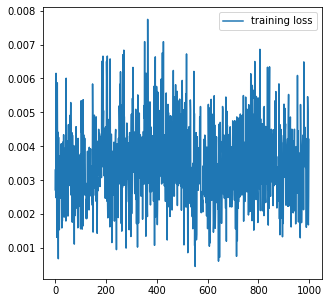

Epoch 0/1000[*******] - Loss: 0.003664
Epoch 1/1000[*******] - Loss: 0.003438
Epoch 2/1000[*******] - Loss: 0.004645
Epoch 3/1000[*******] - Loss: 0.003650
Epoch 4/1000[*******] - Loss: 0.002905
Epoch 5/1000[*******] - Loss: 0.001856
Epoch 6/1000[*******] - Loss: 0.002764
Epoch 7/1000[*******] - Loss: 0.005181
Epoch 8/1000[*******] - Loss: 0.003016
Epoch 9/1000[*******] - Loss: 0.003162
Epoch 10/1000[*******] - Loss: 0.002412
Epoch 11/1000[*******] - Loss: 0.003632
Epoch 12/1000[*******] - Loss: 0.004169
Epoch 13/1000[*******] - Loss: 0.001228
Epoch 14/1000[*******] - Loss: 0.003270
Epoch 15/1000[*******] - Loss: 0.003779
Epoch 16/1000[*******] - Loss: 0.004353
Epoch 17/1000[*******] - Loss: 0.004279
Epoch 18/1000[*******] - Loss: 0.002131
Epoch 19/1000[*******] - Loss: 0.001874
Epoch 20/1000[*******] - Loss: 0.005023
Epoch 21/1000[*******] - Loss: 0.003413
Epoch 22/1000[*******] - Loss: 0.002165
Epoch 23/1000[*******] - Loss: 0.002947
Epoch 24/1000[*******] - Loss: 0.003029
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.007070
Epoch 403/1000[*******] - Loss: 0.003212
Epoch 404/1000[*******] - Loss: 0.002243
Epoch 405/1000[*******] - Loss: 0.002902
Epoch 406/1000[*******] - Loss: 0.003080
Epoch 407/1000[*******] - Loss: 0.001243
Epoch 408/1000[*******] - Loss: 0.004055
Epoch 409/1000[*******] - Loss: 0.001710
Epoch 410/1000[*******] - Loss: 0.002178
Epoch 411/1000[*******] - Loss: 0.001268
Epoch 412/1000[*******] - Loss: 0.002783
Epoch 413/1000[*******] - Loss: 0.001450
Epoch 414/1000[*******] - Loss: 0.002402
Epoch 415/1000[*******] - Loss: 0.003164
Epoch 416/1000[*******] - Loss: 0.003127
Epoch 417/1000[*******] - Loss: 0.004258
Epoch 418/1000[*******] - Loss: 0.001747
Epoch 419/1000[*******] - Loss: 0.003541
Epoch 420/1000[*******] - Loss: 0.004643
Epoch 421/1000[*******] - Loss: 0.006026
Epoch 422/1000[*******] - Loss: 0.004236
Epoch 423/1000[*******] - Loss: 0.004204
Epoch 424/1000[*******] - Loss: 0.002250
Epoch 425/1000[*******] - Loss: 0.002023
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.002255
Epoch 603/1000[*******] - Loss: 0.002477
Epoch 604/1000[*******] - Loss: 0.003723
Epoch 605/1000[*******] - Loss: 0.000851
Epoch 606/1000[*******] - Loss: 0.002161
Epoch 607/1000[*******] - Loss: 0.003158
Epoch 608/1000[*******] - Loss: 0.003103
Epoch 609/1000[*******] - Loss: 0.003902
Epoch 610/1000[*******] - Loss: 0.004136
Epoch 611/1000[*******] - Loss: 0.003307
Epoch 612/1000[*******] - Loss: 0.001176
Epoch 613/1000[*******] - Loss: 0.003119
Epoch 614/1000[*******] - Loss: 0.002225
Epoch 615/1000[*******] - Loss: 0.002354
Epoch 616/1000[*******] - Loss: 0.003185
Epoch 617/1000[*******] - Loss: 0.003544
Epoch 618/1000[*******] - Loss: 0.004357
Epoch 619/1000[*******] - Loss: 0.003760
Epoch 620/1000[*******] - Loss: 0.003188
Epoch 621/1000[*******] - Loss: 0.004278
Epoch 622/1000[*******] - Loss: 0.002512
Epoch 623/1000[*******] - Loss: 0.001929
Epoch 624/1000[*******] - Loss: 0.002994
Epoch 625/1000[*******] - Loss: 0.002187
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.001880
Epoch 803/1000[*******] - Loss: 0.000723
Epoch 804/1000[*******] - Loss: 0.005685
Epoch 805/1000[*******] - Loss: 0.005451
Epoch 806/1000[*******] - Loss: 0.001859
Epoch 807/1000[*******] - Loss: 0.002707
Epoch 808/1000[*******] - Loss: 0.003480
Epoch 809/1000[*******] - Loss: 0.002790
Epoch 810/1000[*******] - Loss: 0.001484
Epoch 811/1000[*******] - Loss: 0.003582
Epoch 812/1000[*******] - Loss: 0.003124
Epoch 813/1000[*******] - Loss: 0.002883
Epoch 814/1000[*******] - Loss: 0.004733
Epoch 815/1000[*******] - Loss: 0.004124
Epoch 816/1000[*******] - Loss: 0.001794
Epoch 817/1000[*******] - Loss: 0.002148
Epoch 818/1000[*******] - Loss: 0.002958
Epoch 819/1000[*******] - Loss: 0.004006
Epoch 820/1000[*******] - Loss: 0.003690
Epoch 821/1000[*******] - Loss: 0.002107
Epoch 822/1000[*******] - Loss: 0.001535
Epoch 823/1000[*******] - Loss: 0.001615
Epoch 824/1000[*******] - Loss: 0.005242
Epoch 825/1000[*******] - Loss: 0.004544
Epoch 826/1000[*

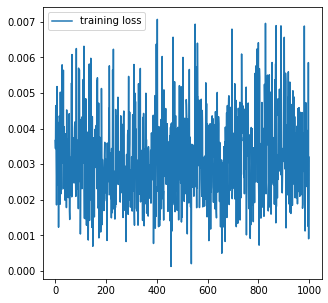

Epoch 0/1000[*******] - Loss: 0.003306
Epoch 1/1000[*******] - Loss: 0.004330
Epoch 2/1000[*******] - Loss: 0.002221
Epoch 3/1000[*******] - Loss: 0.002853
Epoch 4/1000[*******] - Loss: 0.002034
Epoch 5/1000[*******] - Loss: 0.001307
Epoch 6/1000[*******] - Loss: 0.003178
Epoch 7/1000[*******] - Loss: 0.001499
Epoch 8/1000[*******] - Loss: 0.003307
Epoch 9/1000[*******] - Loss: 0.002534
Epoch 10/1000[*******] - Loss: 0.004990
Epoch 11/1000[*******] - Loss: 0.002372
Epoch 12/1000[*******] - Loss: 0.001747
Epoch 13/1000[*******] - Loss: 0.002364
Epoch 14/1000[*******] - Loss: 0.002544
Epoch 15/1000[*******] - Loss: 0.003412
Epoch 16/1000[*******] - Loss: 0.004808
Epoch 17/1000[*******] - Loss: 0.003034
Epoch 18/1000[*******] - Loss: 0.004332
Epoch 19/1000[*******] - Loss: 0.004963
Epoch 20/1000[*******] - Loss: 0.003906
Epoch 21/1000[*******] - Loss: 0.003611
Epoch 22/1000[*******] - Loss: 0.004008
Epoch 23/1000[*******] - Loss: 0.004692
Epoch 24/1000[*******] - Loss: 0.001386
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.002881
Epoch 403/1000[*******] - Loss: 0.003865
Epoch 404/1000[*******] - Loss: 0.004063
Epoch 405/1000[*******] - Loss: 0.003284
Epoch 406/1000[*******] - Loss: 0.003365
Epoch 407/1000[*******] - Loss: 0.003665
Epoch 408/1000[*******] - Loss: 0.003109
Epoch 409/1000[*******] - Loss: 0.004051
Epoch 410/1000[*******] - Loss: 0.005864
Epoch 411/1000[*******] - Loss: 0.006135
Epoch 412/1000[*******] - Loss: 0.003215
Epoch 413/1000[*******] - Loss: 0.007664
Epoch 414/1000[*******] - Loss: 0.001516
Epoch 415/1000[*******] - Loss: 0.006239
Epoch 416/1000[*******] - Loss: 0.006012
Epoch 417/1000[*******] - Loss: 0.007014
Epoch 418/1000[*******] - Loss: 0.002949
Epoch 419/1000[*******] - Loss: 0.001458
Epoch 420/1000[*******] - Loss: 0.004317
Epoch 421/1000[*******] - Loss: 0.003325
Epoch 422/1000[*******] - Loss: 0.005295
Epoch 423/1000[*******] - Loss: 0.003927
Epoch 424/1000[*******] - Loss: 0.002367
Epoch 425/1000[*******] - Loss: 0.003619
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.004008
Epoch 603/1000[*******] - Loss: 0.002042
Epoch 604/1000[*******] - Loss: 0.006600
Epoch 605/1000[*******] - Loss: 0.003301
Epoch 606/1000[*******] - Loss: 0.005711
Epoch 607/1000[*******] - Loss: 0.003730
Epoch 608/1000[*******] - Loss: 0.005378
Epoch 609/1000[*******] - Loss: 0.001791
Epoch 610/1000[*******] - Loss: 0.005138
Epoch 611/1000[*******] - Loss: 0.004234
Epoch 612/1000[*******] - Loss: 0.002979
Epoch 613/1000[*******] - Loss: 0.004839
Epoch 614/1000[*******] - Loss: 0.004362
Epoch 615/1000[*******] - Loss: 0.003142
Epoch 616/1000[*******] - Loss: 0.001307
Epoch 617/1000[*******] - Loss: 0.002611
Epoch 618/1000[*******] - Loss: 0.003510
Epoch 619/1000[*******] - Loss: 0.005390
Epoch 620/1000[*******] - Loss: 0.003228
Epoch 621/1000[*******] - Loss: 0.001922
Epoch 622/1000[*******] - Loss: 0.004226
Epoch 623/1000[*******] - Loss: 0.003947
Epoch 624/1000[*******] - Loss: 0.003768
Epoch 625/1000[*******] - Loss: 0.003756
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.006152
Epoch 803/1000[*******] - Loss: 0.003332
Epoch 804/1000[*******] - Loss: 0.003793
Epoch 805/1000[*******] - Loss: 0.003140
Epoch 806/1000[*******] - Loss: 0.003768
Epoch 807/1000[*******] - Loss: 0.002448
Epoch 808/1000[*******] - Loss: 0.003431
Epoch 809/1000[*******] - Loss: 0.002933
Epoch 810/1000[*******] - Loss: 0.002671
Epoch 811/1000[*******] - Loss: 0.002727
Epoch 812/1000[*******] - Loss: 0.002143
Epoch 813/1000[*******] - Loss: 0.003770
Epoch 814/1000[*******] - Loss: 0.001977
Epoch 815/1000[*******] - Loss: 0.003573
Epoch 816/1000[*******] - Loss: 0.001777
Epoch 817/1000[*******] - Loss: 0.002411
Epoch 818/1000[*******] - Loss: 0.005661
Epoch 819/1000[*******] - Loss: 0.003346
Epoch 820/1000[*******] - Loss: 0.003447
Epoch 821/1000[*******] - Loss: 0.002170
Epoch 822/1000[*******] - Loss: 0.002523
Epoch 823/1000[*******] - Loss: 0.003738
Epoch 824/1000[*******] - Loss: 0.003018
Epoch 825/1000[*******] - Loss: 0.002413
Epoch 826/1000[*

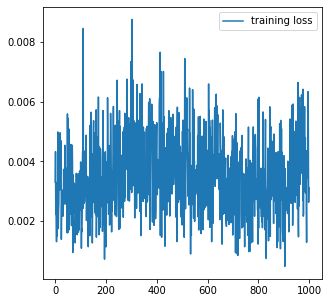

Epoch 0/1000[*******] - Loss: 0.004252
Epoch 1/1000[*******] - Loss: 0.004725
Epoch 2/1000[*******] - Loss: 0.003540
Epoch 3/1000[*******] - Loss: 0.004576
Epoch 4/1000[*******] - Loss: 0.003471
Epoch 5/1000[*******] - Loss: 0.001817
Epoch 6/1000[*******] - Loss: 0.003063
Epoch 7/1000[*******] - Loss: 0.003695
Epoch 8/1000[*******] - Loss: 0.004447
Epoch 9/1000[*******] - Loss: 0.002860
Epoch 10/1000[*******] - Loss: 0.003395
Epoch 11/1000[*******] - Loss: 0.002076
Epoch 12/1000[*******] - Loss: 0.006355
Epoch 13/1000[*******] - Loss: 0.003154
Epoch 14/1000[*******] - Loss: 0.004220
Epoch 15/1000[*******] - Loss: 0.004115
Epoch 16/1000[*******] - Loss: 0.003766
Epoch 17/1000[*******] - Loss: 0.006156
Epoch 18/1000[*******] - Loss: 0.005822
Epoch 19/1000[*******] - Loss: 0.003816
Epoch 20/1000[*******] - Loss: 0.005081
Epoch 21/1000[*******] - Loss: 0.002934
Epoch 22/1000[*******] - Loss: 0.003753
Epoch 23/1000[*******] - Loss: 0.003615
Epoch 24/1000[*******] - Loss: 0.002047
Epoch 25/1

Epoch 203/1000[*******] - Loss: 0.004997
Epoch 204/1000[*******] - Loss: 0.007008
Epoch 205/1000[*******] - Loss: 0.006680
Epoch 206/1000[*******] - Loss: 0.005371
Epoch 207/1000[*******] - Loss: 0.008701
Epoch 208/1000[*******] - Loss: 0.004810
Epoch 209/1000[*******] - Loss: 0.004679
Epoch 210/1000[*******] - Loss: 0.008562
Epoch 211/1000[*******] - Loss: 0.004140
Epoch 212/1000[*******] - Loss: 0.004114
Epoch 213/1000[*******] - Loss: 0.005043
Epoch 214/1000[*******] - Loss: 0.006823
Epoch 215/1000[*******] - Loss: 0.008701
Epoch 216/1000[*******] - Loss: 0.005539
Epoch 217/1000[*******] - Loss: 0.005722
Epoch 218/1000[*******] - Loss: 0.007324
Epoch 219/1000[*******] - Loss: 0.005268
Epoch 220/1000[*******] - Loss: 0.006152
Epoch 221/1000[*******] - Loss: 0.005631
Epoch 222/1000[*******] - Loss: 0.003456
Epoch 223/1000[*******] - Loss: 0.005742
Epoch 224/1000[*******] - Loss: 0.006245
Epoch 225/1000[*******] - Loss: 0.003021
Epoch 226/1000[*******] - Loss: 0.002934
Epoch 227/1000[*

Epoch 403/1000[*******] - Loss: 0.002772
Epoch 404/1000[*******] - Loss: 0.002692
Epoch 405/1000[*******] - Loss: 0.003839
Epoch 406/1000[*******] - Loss: 0.004257
Epoch 407/1000[*******] - Loss: 0.004999
Epoch 408/1000[*******] - Loss: 0.004854
Epoch 409/1000[*******] - Loss: 0.005855
Epoch 410/1000[*******] - Loss: 0.004664
Epoch 411/1000[*******] - Loss: 0.002724
Epoch 412/1000[*******] - Loss: 0.006197
Epoch 413/1000[*******] - Loss: 0.003701
Epoch 414/1000[*******] - Loss: 0.003200
Epoch 415/1000[*******] - Loss: 0.004599
Epoch 416/1000[*******] - Loss: 0.003614
Epoch 417/1000[*******] - Loss: 0.004548
Epoch 418/1000[*******] - Loss: 0.005771
Epoch 419/1000[*******] - Loss: 0.003161
Epoch 420/1000[*******] - Loss: 0.003751
Epoch 421/1000[*******] - Loss: 0.004303
Epoch 422/1000[*******] - Loss: 0.003490
Epoch 423/1000[*******] - Loss: 0.003328
Epoch 424/1000[*******] - Loss: 0.004400
Epoch 425/1000[*******] - Loss: 0.006984
Epoch 426/1000[*******] - Loss: 0.003411
Epoch 427/1000[*

Epoch 603/1000[*******] - Loss: 0.001725
Epoch 604/1000[*******] - Loss: 0.002342
Epoch 605/1000[*******] - Loss: 0.003823
Epoch 606/1000[*******] - Loss: 0.003314
Epoch 607/1000[*******] - Loss: 0.002825
Epoch 608/1000[*******] - Loss: 0.001547
Epoch 609/1000[*******] - Loss: 0.000562
Epoch 610/1000[*******] - Loss: 0.003432
Epoch 611/1000[*******] - Loss: 0.004274
Epoch 612/1000[*******] - Loss: 0.002582
Epoch 613/1000[*******] - Loss: 0.004307
Epoch 614/1000[*******] - Loss: 0.002792
Epoch 615/1000[*******] - Loss: 0.002029
Epoch 616/1000[*******] - Loss: 0.002854
Epoch 617/1000[*******] - Loss: 0.002195
Epoch 618/1000[*******] - Loss: 0.004327
Epoch 619/1000[*******] - Loss: 0.003302
Epoch 620/1000[*******] - Loss: 0.001641
Epoch 621/1000[*******] - Loss: 0.004456
Epoch 622/1000[*******] - Loss: 0.001986
Epoch 623/1000[*******] - Loss: 0.004152
Epoch 624/1000[*******] - Loss: 0.002725
Epoch 625/1000[*******] - Loss: 0.001730
Epoch 626/1000[*******] - Loss: 0.003170
Epoch 627/1000[*

Epoch 803/1000[*******] - Loss: 0.002165
Epoch 804/1000[*******] - Loss: 0.002845
Epoch 805/1000[*******] - Loss: 0.005197
Epoch 806/1000[*******] - Loss: 0.002326
Epoch 807/1000[*******] - Loss: 0.002425
Epoch 808/1000[*******] - Loss: 0.003777
Epoch 809/1000[*******] - Loss: 0.001230
Epoch 810/1000[*******] - Loss: 0.002607
Epoch 811/1000[*******] - Loss: 0.001664
Epoch 812/1000[*******] - Loss: 0.003500
Epoch 813/1000[*******] - Loss: 0.002626
Epoch 814/1000[*******] - Loss: 0.002302
Epoch 815/1000[*******] - Loss: 0.001843
Epoch 816/1000[*******] - Loss: 0.001348
Epoch 817/1000[*******] - Loss: 0.003048
Epoch 818/1000[*******] - Loss: 0.002121
Epoch 819/1000[*******] - Loss: 0.004029
Epoch 820/1000[*******] - Loss: 0.003872
Epoch 821/1000[*******] - Loss: 0.002934
Epoch 822/1000[*******] - Loss: 0.002360
Epoch 823/1000[*******] - Loss: 0.001827
Epoch 824/1000[*******] - Loss: 0.002203
Epoch 825/1000[*******] - Loss: 0.003410
Epoch 826/1000[*******] - Loss: 0.004283
Epoch 827/1000[*

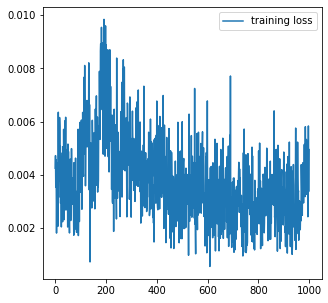

Epoch 0/1000[*******] - Loss: 0.006409
Epoch 1/1000[*******] - Loss: 0.005197
Epoch 2/1000[*******] - Loss: 0.004653
Epoch 3/1000[*******] - Loss: 0.002679
Epoch 4/1000[*******] - Loss: 0.005456
Epoch 5/1000[*******] - Loss: 0.004242
Epoch 6/1000[*******] - Loss: 0.005187
Epoch 7/1000[*******] - Loss: 0.004635
Epoch 8/1000[*******] - Loss: 0.003616
Epoch 9/1000[*******] - Loss: 0.004774
Epoch 10/1000[*******] - Loss: 0.004450
Epoch 11/1000[*******] - Loss: 0.003723
Epoch 12/1000[*******] - Loss: 0.003581
Epoch 13/1000[*******] - Loss: 0.004948
Epoch 14/1000[*******] - Loss: 0.003931
Epoch 15/1000[*******] - Loss: 0.003309
Epoch 16/1000[*******] - Loss: 0.005860
Epoch 17/1000[*******] - Loss: 0.003847
Epoch 18/1000[*******] - Loss: 0.006896
Epoch 19/1000[*******] - Loss: 0.003574
Epoch 20/1000[*******] - Loss: 0.002292
Epoch 21/1000[*******] - Loss: 0.003912
Epoch 22/1000[*******] - Loss: 0.004273
Epoch 23/1000[*******] - Loss: 0.002511
Epoch 24/1000[*******] - Loss: 0.003384
Epoch 25/1

Epoch 203/1000[*******] - Loss: 0.001240
Epoch 204/1000[*******] - Loss: 0.003024
Epoch 205/1000[*******] - Loss: 0.005845
Epoch 206/1000[*******] - Loss: 0.003959
Epoch 207/1000[*******] - Loss: 0.005466
Epoch 208/1000[*******] - Loss: 0.001553
Epoch 209/1000[*******] - Loss: 0.003835
Epoch 210/1000[*******] - Loss: 0.001616
Epoch 211/1000[*******] - Loss: 0.007384
Epoch 212/1000[*******] - Loss: 0.004969
Epoch 213/1000[*******] - Loss: 0.002901
Epoch 214/1000[*******] - Loss: 0.004483
Epoch 215/1000[*******] - Loss: 0.002503
Epoch 216/1000[*******] - Loss: 0.003157
Epoch 217/1000[*******] - Loss: 0.002505
Epoch 218/1000[*******] - Loss: 0.004379
Epoch 219/1000[*******] - Loss: 0.002700
Epoch 220/1000[*******] - Loss: 0.003196
Epoch 221/1000[*******] - Loss: 0.001672
Epoch 222/1000[*******] - Loss: 0.002469
Epoch 223/1000[*******] - Loss: 0.003149
Epoch 224/1000[*******] - Loss: 0.002233
Epoch 225/1000[*******] - Loss: 0.003821
Epoch 226/1000[*******] - Loss: 0.004374
Epoch 227/1000[*

Epoch 403/1000[*******] - Loss: 0.002907
Epoch 404/1000[*******] - Loss: 0.000997
Epoch 405/1000[*******] - Loss: 0.002518
Epoch 406/1000[*******] - Loss: 0.003256
Epoch 407/1000[*******] - Loss: 0.003202
Epoch 408/1000[*******] - Loss: 0.003067
Epoch 409/1000[*******] - Loss: 0.002936
Epoch 410/1000[*******] - Loss: 0.002343
Epoch 411/1000[*******] - Loss: 0.004838
Epoch 412/1000[*******] - Loss: 0.002420
Epoch 413/1000[*******] - Loss: 0.003644
Epoch 414/1000[*******] - Loss: 0.005391
Epoch 415/1000[*******] - Loss: 0.002951
Epoch 416/1000[*******] - Loss: 0.001478
Epoch 417/1000[*******] - Loss: 0.003494
Epoch 418/1000[*******] - Loss: 0.003436
Epoch 419/1000[*******] - Loss: 0.002446
Epoch 420/1000[*******] - Loss: 0.004331
Epoch 421/1000[*******] - Loss: 0.004021
Epoch 422/1000[*******] - Loss: 0.003363
Epoch 423/1000[*******] - Loss: 0.003606
Epoch 424/1000[*******] - Loss: 0.004124
Epoch 425/1000[*******] - Loss: 0.001485
Epoch 426/1000[*******] - Loss: 0.002992
Epoch 427/1000[*

Epoch 603/1000[*******] - Loss: 0.001956
Epoch 604/1000[*******] - Loss: 0.002074
Epoch 605/1000[*******] - Loss: 0.003902
Epoch 606/1000[*******] - Loss: 0.004691
Epoch 607/1000[*******] - Loss: 0.003189
Epoch 608/1000[*******] - Loss: 0.002425
Epoch 609/1000[*******] - Loss: 0.003243
Epoch 610/1000[*******] - Loss: 0.003596
Epoch 611/1000[*******] - Loss: 0.002815
Epoch 612/1000[*******] - Loss: 0.004106
Epoch 613/1000[*******] - Loss: 0.002762
Epoch 614/1000[*******] - Loss: 0.001893
Epoch 615/1000[*******] - Loss: 0.002865
Epoch 616/1000[*******] - Loss: 0.003477
Epoch 617/1000[*******] - Loss: 0.003606
Epoch 618/1000[*******] - Loss: 0.001691
Epoch 619/1000[*******] - Loss: 0.002060
Epoch 620/1000[*******] - Loss: 0.003235
Epoch 621/1000[*******] - Loss: 0.004818
Epoch 622/1000[*******] - Loss: 0.003470
Epoch 623/1000[*******] - Loss: 0.002549
Epoch 624/1000[*******] - Loss: 0.002813
Epoch 625/1000[*******] - Loss: 0.002631
Epoch 626/1000[*******] - Loss: 0.002481
Epoch 627/1000[*

Epoch 803/1000[*******] - Loss: 0.003172
Epoch 804/1000[*******] - Loss: 0.002912
Epoch 805/1000[*******] - Loss: 0.002083
Epoch 806/1000[*******] - Loss: 0.004189
Epoch 807/1000[*******] - Loss: 0.001833
Epoch 808/1000[*******] - Loss: 0.003159
Epoch 809/1000[*******] - Loss: 0.001839
Epoch 810/1000[*******] - Loss: 0.002937
Epoch 811/1000[*******] - Loss: 0.001374
Epoch 812/1000[*******] - Loss: 0.003359
Epoch 813/1000[*******] - Loss: 0.004078
Epoch 814/1000[*******] - Loss: 0.001777
Epoch 815/1000[*******] - Loss: 0.002905
Epoch 816/1000[*******] - Loss: 0.003478
Epoch 817/1000[*******] - Loss: 0.003715
Epoch 818/1000[*******] - Loss: 0.001381
Epoch 819/1000[*******] - Loss: 0.002410
Epoch 820/1000[*******] - Loss: 0.002282
Epoch 821/1000[*******] - Loss: 0.002751
Epoch 822/1000[*******] - Loss: 0.002946
Epoch 823/1000[*******] - Loss: 0.003788
Epoch 824/1000[*******] - Loss: 0.003225
Epoch 825/1000[*******] - Loss: 0.002939
Epoch 826/1000[*******] - Loss: 0.004104
Epoch 827/1000[*

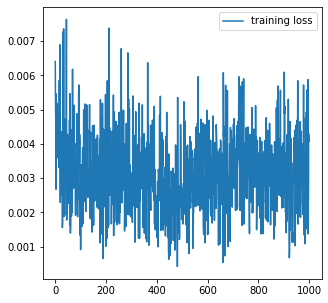

Epoch 0/1000[*******] - Loss: 0.005013
Epoch 1/1000[*******] - Loss: 0.004693
Epoch 2/1000[*******] - Loss: 0.005840
Epoch 3/1000[*******] - Loss: 0.003824
Epoch 4/1000[*******] - Loss: 0.003888
Epoch 5/1000[*******] - Loss: 0.003410
Epoch 6/1000[*******] - Loss: 0.004340
Epoch 7/1000[*******] - Loss: 0.005857
Epoch 8/1000[*******] - Loss: 0.004370
Epoch 9/1000[*******] - Loss: 0.003959
Epoch 10/1000[*******] - Loss: 0.002094
Epoch 11/1000[*******] - Loss: 0.002543
Epoch 12/1000[*******] - Loss: 0.001811
Epoch 13/1000[*******] - Loss: 0.003953
Epoch 14/1000[*******] - Loss: 0.002744
Epoch 15/1000[*******] - Loss: 0.005982
Epoch 16/1000[*******] - Loss: 0.004443
Epoch 17/1000[*******] - Loss: 0.002520
Epoch 18/1000[*******] - Loss: 0.004388
Epoch 19/1000[*******] - Loss: 0.007279
Epoch 20/1000[*******] - Loss: 0.004236
Epoch 21/1000[*******] - Loss: 0.004812
Epoch 22/1000[*******] - Loss: 0.002602
Epoch 23/1000[*******] - Loss: 0.003965
Epoch 24/1000[*******] - Loss: 0.003246
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.002988
Epoch 403/1000[*******] - Loss: 0.004004
Epoch 404/1000[*******] - Loss: 0.004159
Epoch 405/1000[*******] - Loss: 0.004548
Epoch 406/1000[*******] - Loss: 0.004681
Epoch 407/1000[*******] - Loss: 0.002167
Epoch 408/1000[*******] - Loss: 0.003246
Epoch 409/1000[*******] - Loss: 0.003286
Epoch 410/1000[*******] - Loss: 0.004507
Epoch 411/1000[*******] - Loss: 0.003970
Epoch 412/1000[*******] - Loss: 0.005582
Epoch 413/1000[*******] - Loss: 0.003022
Epoch 414/1000[*******] - Loss: 0.003249
Epoch 415/1000[*******] - Loss: 0.004033
Epoch 416/1000[*******] - Loss: 0.003022
Epoch 417/1000[*******] - Loss: 0.002102
Epoch 418/1000[*******] - Loss: 0.003441
Epoch 419/1000[*******] - Loss: 0.003165
Epoch 420/1000[*******] - Loss: 0.002387
Epoch 421/1000[*******] - Loss: 0.003140
Epoch 422/1000[*******] - Loss: 0.004169
Epoch 423/1000[*******] - Loss: 0.002633
Epoch 424/1000[*******] - Loss: 0.003312
Epoch 425/1000[*******] - Loss: 0.004257
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.004377
Epoch 603/1000[*******] - Loss: 0.002617
Epoch 604/1000[*******] - Loss: 0.001159
Epoch 605/1000[*******] - Loss: 0.002383
Epoch 606/1000[*******] - Loss: 0.003111
Epoch 607/1000[*******] - Loss: 0.002731
Epoch 608/1000[*******] - Loss: 0.001793
Epoch 609/1000[*******] - Loss: 0.002983
Epoch 610/1000[*******] - Loss: 0.002260
Epoch 611/1000[*******] - Loss: 0.002879
Epoch 612/1000[*******] - Loss: 0.002510
Epoch 613/1000[*******] - Loss: 0.003255
Epoch 614/1000[*******] - Loss: 0.004624
Epoch 615/1000[*******] - Loss: 0.003048
Epoch 616/1000[*******] - Loss: 0.003319
Epoch 617/1000[*******] - Loss: 0.001927
Epoch 618/1000[*******] - Loss: 0.002444
Epoch 619/1000[*******] - Loss: 0.003608
Epoch 620/1000[*******] - Loss: 0.002526
Epoch 621/1000[*******] - Loss: 0.000673
Epoch 622/1000[*******] - Loss: 0.001325
Epoch 623/1000[*******] - Loss: 0.002628
Epoch 624/1000[*******] - Loss: 0.003886
Epoch 625/1000[*******] - Loss: 0.002036
Epoch 626/1000[*

Epoch 802/1000[*******] - Loss: 0.002643
Epoch 803/1000[*******] - Loss: 0.002166
Epoch 804/1000[*******] - Loss: 0.002325
Epoch 805/1000[*******] - Loss: 0.001212
Epoch 806/1000[*******] - Loss: 0.003037
Epoch 807/1000[*******] - Loss: 0.001927
Epoch 808/1000[*******] - Loss: 0.002748
Epoch 809/1000[*******] - Loss: 0.000539
Epoch 810/1000[*******] - Loss: 0.005176
Epoch 811/1000[*******] - Loss: 0.001749
Epoch 812/1000[*******] - Loss: 0.001383
Epoch 813/1000[*******] - Loss: 0.002280
Epoch 814/1000[*******] - Loss: 0.003815
Epoch 815/1000[*******] - Loss: 0.004040
Epoch 816/1000[*******] - Loss: 0.002153
Epoch 817/1000[*******] - Loss: 0.001978
Epoch 818/1000[*******] - Loss: 0.003794
Epoch 819/1000[*******] - Loss: 0.002349
Epoch 820/1000[*******] - Loss: 0.001555
Epoch 821/1000[*******] - Loss: 0.000839
Epoch 822/1000[*******] - Loss: 0.002702
Epoch 823/1000[*******] - Loss: 0.001054
Epoch 824/1000[*******] - Loss: 0.003438
Epoch 825/1000[*******] - Loss: 0.002524
Epoch 826/1000[*

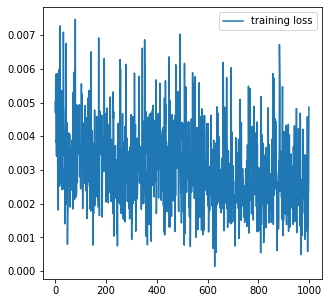

Epoch 0/1000[*******] - Loss: 0.001822
Epoch 1/1000[*******] - Loss: 0.001307
Epoch 2/1000[*******] - Loss: 0.001859
Epoch 3/1000[*******] - Loss: 0.002649
Epoch 4/1000[*******] - Loss: 0.002622
Epoch 5/1000[*******] - Loss: 0.002549
Epoch 6/1000[*******] - Loss: 0.001928
Epoch 7/1000[*******] - Loss: 0.002128
Epoch 8/1000[*******] - Loss: 0.003768
Epoch 9/1000[*******] - Loss: 0.002745
Epoch 10/1000[*******] - Loss: 0.002868
Epoch 11/1000[*******] - Loss: 0.002182
Epoch 12/1000[*******] - Loss: 0.004382
Epoch 13/1000[*******] - Loss: 0.003443
Epoch 14/1000[*******] - Loss: 0.002236
Epoch 15/1000[*******] - Loss: 0.002862
Epoch 16/1000[*******] - Loss: 0.002323
Epoch 17/1000[*******] - Loss: 0.002552
Epoch 18/1000[*******] - Loss: 0.000880
Epoch 19/1000[*******] - Loss: 0.000978
Epoch 20/1000[*******] - Loss: 0.001779
Epoch 21/1000[*******] - Loss: 0.003618
Epoch 22/1000[*******] - Loss: 0.004980
Epoch 23/1000[*******] - Loss: 0.004262
Epoch 24/1000[*******] - Loss: 0.002170
Epoch 25/1

Epoch 402/1000[*******] - Loss: 0.003320
Epoch 403/1000[*******] - Loss: 0.002538
Epoch 404/1000[*******] - Loss: 0.002727
Epoch 405/1000[*******] - Loss: 0.005854
Epoch 406/1000[*******] - Loss: 0.003038
Epoch 407/1000[*******] - Loss: 0.006234
Epoch 408/1000[*******] - Loss: 0.002334
Epoch 409/1000[*******] - Loss: 0.001774
Epoch 410/1000[*******] - Loss: 0.002666
Epoch 411/1000[*******] - Loss: 0.000625
Epoch 412/1000[*******] - Loss: 0.000993
Epoch 413/1000[*******] - Loss: 0.003435
Epoch 414/1000[*******] - Loss: 0.002360
Epoch 415/1000[*******] - Loss: 0.002346
Epoch 416/1000[*******] - Loss: 0.005011
Epoch 417/1000[*******] - Loss: 0.003834
Epoch 418/1000[*******] - Loss: 0.004964
Epoch 419/1000[*******] - Loss: 0.002305
Epoch 420/1000[*******] - Loss: 0.003003
Epoch 421/1000[*******] - Loss: 0.003597
Epoch 422/1000[*******] - Loss: 0.002362
Epoch 423/1000[*******] - Loss: 0.002816
Epoch 424/1000[*******] - Loss: 0.002667
Epoch 425/1000[*******] - Loss: 0.005025
Epoch 426/1000[*

Epoch 602/1000[*******] - Loss: 0.003099
Epoch 603/1000[*******] - Loss: 0.001158
Epoch 604/1000[*******] - Loss: 0.001531
Epoch 605/1000[*******] - Loss: 0.001647
Epoch 606/1000[*******] - Loss: 0.002239
Epoch 607/1000[*******] - Loss: 0.004061
Epoch 608/1000[*******] - Loss: 0.003286
Epoch 609/1000[*******] - Loss: 0.001891
Epoch 610/1000[*******] - Loss: 0.002326
Epoch 611/1000[*******] - Loss: 0.002191
Epoch 612/1000[*******] - Loss: 0.001706
Epoch 613/1000[*******] - Loss: 0.002581
Epoch 614/1000[*******] - Loss: 0.003707
Epoch 615/1000[*******] - Loss: 0.002070
Epoch 616/1000[*******] - Loss: 0.002685
Epoch 617/1000[*******] - Loss: 0.004172
Epoch 618/1000[*******] - Loss: 0.001794
Epoch 619/1000[*******] - Loss: 0.002762
Epoch 620/1000[*******] - Loss: 0.003988
Epoch 621/1000[*******] - Loss: 0.003997
Epoch 622/1000[*******] - Loss: 0.002899
Epoch 623/1000[*******] - Loss: 0.003847
Epoch 624/1000[*******] - Loss: 0.002456
Epoch 625/1000[*******] - Loss: 0.002042
Epoch 626/1000[*

KeyboardInterrupt: 

In [51]:
 
TL_001.show=0 
min_loss=10
for gn in range(1000):
    H =TL_001.fit_dataloader_CLASS(  \
                None,loader=dataloader,   epochs = 1000, validation_loader = None)
    plt.figure(figsize=(5,5))
    plt.plot(H.history['loss'], label='training loss')
    #plt.plot(H.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()
    loss_=H.history['loss'][-1]
    if loss_<min_loss:
        TL_001.conv2Dfeatures.save_state('conv2Dfeatures00.pt')
        TL_001.fully_connect_modul_0.save_state('fully_connect_modul00.pt')         
         
        print("loss:  ",loss_)
        min_loss=loss_
        
    dataset1 = DatasetForTripletLoss('c:/IMAGE_PROCESSING/NeyralNetwork/TripletLoss/DATAbase/000/',0) 
    dataloader = DataLoader(dataset1, batch_size=3)
     


In [52]:
TL_001.conv2Dfeatures.save_state('conv2Dfeatures00.pt')
TL_001.fully_connect_modul_0.save_state('fully_connect_modul00.pt')         

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             104
         LeakyReLU-2            [-1, 4, 32, 32]               0
            Conv2d-3             [-1, 16, 8, 8]           1,616
         LeakyReLU-4             [-1, 16, 8, 8]               0
            Conv2d-5             [-1, 22, 8, 8]           3,190
         MaxPool2d-6             [-1, 22, 4, 4]               0
         LeakyReLU-7             [-1, 22, 4, 4]               0
           Flatten-8                  [-1, 352]               0
conv_simple_features_00-9                  [-1, 352]               0
           Linear-10                  [-1, 256]          90,368
          Dropout-11                  [-1, 256]               0
        LeakyReLU-12                  [-1, 256]               0
      BatchNorm1d-13                  [-1, 256]             512
           Linear-14              

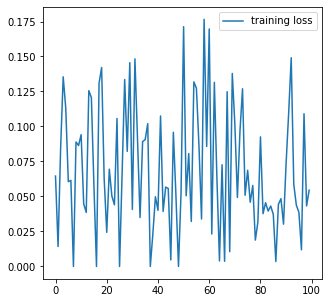

loss:   0.05447604941825072
Epoch 0/100[**] - Loss: 0.017403
Epoch 1/100[**] - Loss: 0.053384
Epoch 2/100[***] - Loss: 0.071065
Epoch 3/100[**] - Loss: 0.008608
Epoch 4/100[**] - Loss: 0.036197
Epoch 5/100[***] - Loss: 0.014543
Epoch 6/100[**] - Loss: 0.002133
Epoch 7/100[**] - Loss: 0.000000
Epoch 8/100[***] - Loss: 0.090357
Epoch 9/100[**] - Loss: 0.026142
Epoch 10/100[**] - Loss: 0.040125
Epoch 11/100[***] - Loss: 0.311442
Epoch 12/100[**] - Loss: 0.003766
Epoch 13/100[**] - Loss: 0.008843
Epoch 14/100[***] - Loss: 0.009907
Epoch 15/100[**] - Loss: 0.078082
Epoch 16/100[**] - Loss: 0.156736
Epoch 17/100[***] - Loss: 0.065449
Epoch 18/100[**] - Loss: 0.081432
Epoch 19/100[**] - Loss: 0.108926
Epoch 20/100[***] - Loss: 0.029066
Epoch 21/100[**] - Loss: 0.030343
Epoch 22/100[**] - Loss: 0.016652
Epoch 23/100[***] - Loss: 0.008102
Epoch 24/100[**] - Loss: 0.000000
Epoch 25/100[**] - Loss: 0.068300
Epoch 26/100[***] - Loss: 0.000000
Epoch 27/100[**] - Loss: 0.091623
Epoch 28/100[**] - Lo

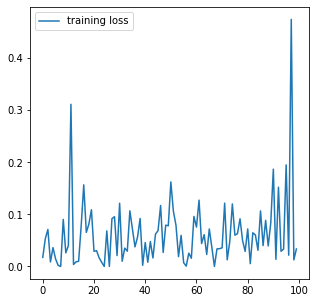

loss:   0.0335744491645268
Epoch 0/100[**] - Loss: 0.030235
Epoch 1/100[**] - Loss: 0.015692
Epoch 2/100[***] - Loss: 0.006487
Epoch 3/100[**] - Loss: 0.039062
Epoch 4/100[**] - Loss: 0.044351
Epoch 5/100[***] - Loss: 0.128444
Epoch 6/100[**] - Loss: 0.057474
Epoch 7/100[**] - Loss: 0.044706
Epoch 8/100[***] - Loss: 0.031049
Epoch 9/100[**] - Loss: 0.033799
Epoch 10/100[**] - Loss: 0.076770
Epoch 11/100[***] - Loss: 0.312471
Epoch 12/100[**] - Loss: 0.054476
Epoch 13/100[**] - Loss: 0.079285
Epoch 14/100[***] - Loss: 0.058298
Epoch 15/100[**] - Loss: 0.050142
Epoch 16/100[**] - Loss: 0.035217
Epoch 17/100[***] - Loss: 0.037099
Epoch 18/100[**] - Loss: 0.007994
Epoch 19/100[**] - Loss: 0.048864
Epoch 20/100[***] - Loss: 0.000000
Epoch 21/100[**] - Loss: 0.076977
Epoch 22/100[**] - Loss: 0.069178
Epoch 23/100[***] - Loss: 0.045689
Epoch 24/100[**] - Loss: 0.051997
Epoch 25/100[**] - Loss: 0.186993
Epoch 26/100[***] - Loss: 0.251154
Epoch 27/100[**] - Loss: 0.228213
Epoch 28/100[**] - Los

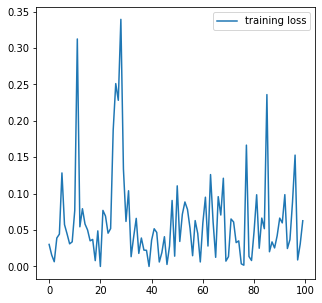

Epoch 0/100[**] - Loss: 0.052323
Epoch 1/100[**] - Loss: 0.033316
Epoch 2/100[***] - Loss: 0.009147
Epoch 3/100[**] - Loss: 0.006299
Epoch 4/100[**] - Loss: 0.026968
Epoch 5/100[***] - Loss: 0.114614
Epoch 6/100[**] - Loss: 0.004947
Epoch 7/100[**] - Loss: 0.007407
Epoch 8/100[***] - Loss: 0.065621
Epoch 9/100[**] - Loss: 0.023248
Epoch 10/100[**] - Loss: 0.042445
Epoch 11/100[***] - Loss: 0.018237
Epoch 12/100[**] - Loss: 0.004020
Epoch 13/100[**] - Loss: 0.027094
Epoch 14/100[***] - Loss: 0.060483
Epoch 15/100[**] - Loss: 0.166196
Epoch 16/100[**] - Loss: 0.026351
Epoch 17/100[***] - Loss: 0.020612
Epoch 18/100[**] - Loss: 0.069523
Epoch 19/100[**] - Loss: 0.086169
Epoch 20/100[***] - Loss: 0.079756
Epoch 21/100[**] - Loss: 0.056328
Epoch 22/100[**] - Loss: 0.040945
Epoch 23/100[***] - Loss: 0.039777
Epoch 24/100[**] - Loss: 0.077872
Epoch 25/100[**] - Loss: 0.084137
Epoch 26/100[***] - Loss: 0.043438
Epoch 27/100[**] - Loss: 0.035208
Epoch 28/100[**] - Loss: 0.010264
Epoch 29/100[**

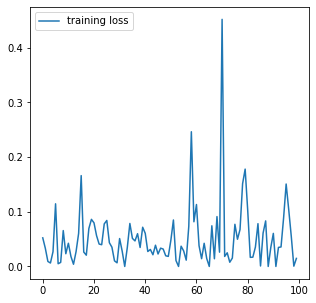

loss:   0.014725221587078912
Epoch 0/100[**] - Loss: 0.059893
Epoch 1/100[**] - Loss: 0.044830
Epoch 2/100[***] - Loss: 0.014202
Epoch 3/100[**] - Loss: 0.025202
Epoch 4/100[**] - Loss: 0.038050
Epoch 5/100[***] - Loss: 0.042779
Epoch 6/100[**] - Loss: 0.463946
Epoch 7/100[**] - Loss: 0.056752
Epoch 8/100[***] - Loss: 0.027644
Epoch 9/100[**] - Loss: 0.042507
Epoch 10/100[**] - Loss: 0.044968
Epoch 11/100[***] - Loss: 0.005018
Epoch 12/100[**] - Loss: 0.144521
Epoch 13/100[**] - Loss: 0.067341
Epoch 14/100[***] - Loss: 0.316457
Epoch 15/100[**] - Loss: 0.000000
Epoch 16/100[**] - Loss: 0.092073
Epoch 17/100[***] - Loss: 0.026368
Epoch 18/100[**] - Loss: 0.149161
Epoch 19/100[**] - Loss: 0.037319
Epoch 20/100[***] - Loss: 0.036689
Epoch 21/100[**] - Loss: 0.057970
Epoch 22/100[**] - Loss: 0.036958
Epoch 23/100[***] - Loss: 0.004646
Epoch 24/100[**] - Loss: 0.078305
Epoch 25/100[**] - Loss: 0.013982
Epoch 26/100[***] - Loss: 0.021475
Epoch 27/100[**] - Loss: 0.011957
Epoch 28/100[**] - L

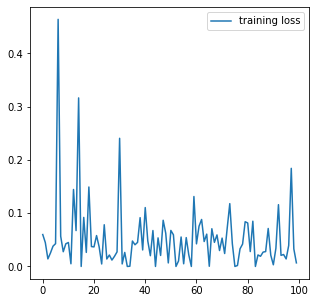

loss:   0.006721690962357181
Epoch 0/100[**] - Loss: 0.017908
Epoch 1/100[**] - Loss: 0.042742
Epoch 2/100[***] - Loss: 0.048250
Epoch 3/100[**] - Loss: 0.011231
Epoch 4/100[**] - Loss: 0.000000
Epoch 5/100[***] - Loss: 0.018483
Epoch 6/100[**] - Loss: 0.019494
Epoch 7/100[**] - Loss: 0.027584
Epoch 8/100[***] - Loss: 0.094535
Epoch 9/100[**] - Loss: 0.148397
Epoch 10/100[**] - Loss: 0.061377
Epoch 11/100[***] - Loss: 0.031174
Epoch 12/100[**] - Loss: 0.147700
Epoch 13/100[**] - Loss: 0.020729
Epoch 14/100[***] - Loss: 0.071900
Epoch 15/100[**] - Loss: 0.046628
Epoch 16/100[**] - Loss: 0.010825
Epoch 17/100[***] - Loss: 0.043452
Epoch 18/100[**] - Loss: 0.017784
Epoch 19/100[**] - Loss: 0.017216
Epoch 20/100[***] - Loss: 0.028291
Epoch 21/100[**] - Loss: 0.090414
Epoch 22/100[**] - Loss: 0.028097
Epoch 23/100[***] - Loss: 0.008838
Epoch 24/100[**] - Loss: 0.013560
Epoch 25/100[**] - Loss: 0.086632
Epoch 26/100[***] - Loss: 0.064529
Epoch 27/100[**] - Loss: 0.026488
Epoch 28/100[**] - L

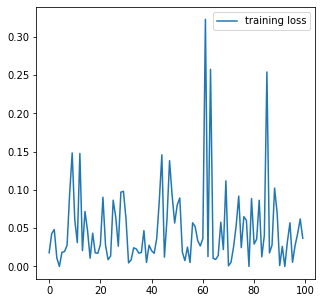

Epoch 0/100[**] - Loss: 0.025999
Epoch 1/100[**] - Loss: 0.015722
Epoch 2/100[***] - Loss: 0.061924
Epoch 3/100[**] - Loss: 0.012403
Epoch 4/100[**] - Loss: 0.058793
Epoch 5/100[***] - Loss: 0.078110
Epoch 6/100[**] - Loss: 0.064409
Epoch 7/100[**] - Loss: 0.010766
Epoch 8/100[***] - Loss: 0.039167
Epoch 9/100[**] - Loss: 0.009424
Epoch 10/100[**] - Loss: 0.217405
Epoch 11/100[***] - Loss: 0.005199
Epoch 12/100[**] - Loss: 0.048511
Epoch 13/100[**] - Loss: 0.077385
Epoch 14/100[***] - Loss: 0.010764
Epoch 15/100[**] - Loss: 0.155295
Epoch 16/100[**] - Loss: 0.029521
Epoch 17/100[***] - Loss: 0.011301
Epoch 18/100[**] - Loss: 0.052554
Epoch 19/100[**] - Loss: 0.096749
Epoch 20/100[***] - Loss: 0.007567
Epoch 21/100[**] - Loss: 0.011231
Epoch 22/100[**] - Loss: 0.010143
Epoch 23/100[***] - Loss: 0.065189
Epoch 24/100[**] - Loss: 0.016281
Epoch 25/100[**] - Loss: 0.003716
Epoch 26/100[***] - Loss: 0.050612
Epoch 27/100[**] - Loss: 0.012046
Epoch 28/100[**] - Loss: 0.055881
Epoch 29/100[**

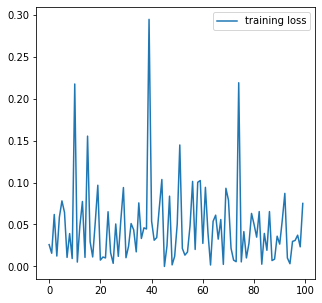

Epoch 0/100[**] - Loss: 0.094125
Epoch 1/100[**] - Loss: 0.053722
Epoch 2/100[***] - Loss: 0.023710
Epoch 3/100[**] - Loss: 0.081625
Epoch 4/100[**] - Loss: 0.054943
Epoch 5/100[***] - Loss: 0.000000
Epoch 6/100[**] - Loss: 0.022976
Epoch 7/100[**] - Loss: 0.022215
Epoch 8/100[***] - Loss: 0.054862
Epoch 9/100[**] - Loss: 0.085312
Epoch 10/100[**] - Loss: 0.124012
Epoch 11/100[***] - Loss: 0.050296
Epoch 12/100[**] - Loss: 0.004713
Epoch 13/100[**] - Loss: 0.044295
Epoch 14/100[***] - Loss: 0.179556
Epoch 15/100[**] - Loss: 0.020389
Epoch 16/100[**] - Loss: 0.008538
Epoch 17/100[***] - Loss: 0.073552
Epoch 18/100[**] - Loss: 0.000000
Epoch 19/100[**] - Loss: 0.211917
Epoch 20/100[***] - Loss: 0.088901
Epoch 21/100[**] - Loss: 0.043723
Epoch 22/100[**] - Loss: 0.096297
Epoch 23/100[***] - Loss: 0.085605
Epoch 24/100[**] - Loss: 0.096472
Epoch 25/100[**] - Loss: 0.053107
Epoch 26/100[***] - Loss: 0.001090
Epoch 27/100[**] - Loss: 0.099180
Epoch 28/100[**] - Loss: 0.000000
Epoch 29/100[**

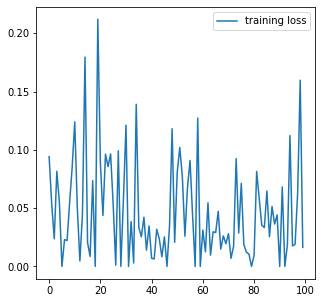

Epoch 0/100[**] - Loss: 0.031632
Epoch 1/100[**] - Loss: 0.046399
Epoch 2/100[***] - Loss: 0.014276
Epoch 3/100[**] - Loss: 0.014414
Epoch 4/100[**] - Loss: 0.059632
Epoch 5/100[***] - Loss: 0.067672
Epoch 6/100[**] - Loss: 0.015424
Epoch 7/100[**] - Loss: 0.000000
Epoch 8/100[***] - Loss: 0.064836
Epoch 9/100[**] - Loss: 0.046029
Epoch 10/100[**] - Loss: 0.000000
Epoch 11/100[***] - Loss: 0.017117
Epoch 12/100[**] - Loss: 0.045141
Epoch 13/100[**] - Loss: 0.000000
Epoch 14/100[***] - Loss: 0.062123
Epoch 15/100[**] - Loss: 0.051741
Epoch 16/100[**] - Loss: 0.097607
Epoch 17/100[***] - Loss: 0.042098
Epoch 18/100[**] - Loss: 0.041562
Epoch 19/100[**] - Loss: 0.054563
Epoch 20/100[***] - Loss: 0.005118
Epoch 21/100[**] - Loss: 0.023799
Epoch 22/100[**] - Loss: 0.017635
Epoch 23/100[***] - Loss: 0.006022
Epoch 24/100[**] - Loss: 0.008529
Epoch 25/100[**] - Loss: 0.017586
Epoch 26/100[***] - Loss: 0.074115
Epoch 27/100[**] - Loss: 0.080844
Epoch 28/100[**] - Loss: 0.068411
Epoch 29/100[**

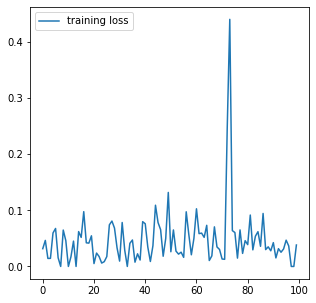

Epoch 0/100[**] - Loss: 0.050048
Epoch 1/100[**] - Loss: 0.047289
Epoch 2/100[***] - Loss: 0.044523
Epoch 3/100[**] - Loss: 0.086274
Epoch 4/100[**] - Loss: 0.051105
Epoch 5/100[***] - Loss: 0.033559
Epoch 6/100[**] - Loss: 0.084561
Epoch 7/100[**] - Loss: 0.042877
Epoch 8/100[***] - Loss: 0.083552
Epoch 9/100[**] - Loss: 0.059974
Epoch 10/100[**] - Loss: 0.027624
Epoch 11/100[***] - Loss: 0.036448
Epoch 12/100[**] - Loss: 0.038066
Epoch 13/100[**] - Loss: 0.039913
Epoch 14/100[***] - Loss: 0.081666
Epoch 15/100[**] - Loss: 0.036439
Epoch 16/100[**] - Loss: 0.000000
Epoch 17/100[***] - Loss: 0.015344
Epoch 18/100[**] - Loss: 0.066739
Epoch 19/100[**] - Loss: 0.069194
Epoch 20/100[***] - Loss: 0.015259
Epoch 21/100[**] - Loss: 0.052040
Epoch 22/100[**] - Loss: 0.097165
Epoch 23/100[***] - Loss: 0.000000
Epoch 24/100[**] - Loss: 0.050715
Epoch 25/100[**] - Loss: 0.020560
Epoch 26/100[***] - Loss: 0.054914
Epoch 27/100[**] - Loss: 0.022709
Epoch 28/100[**] - Loss: 0.089595
Epoch 29/100[**

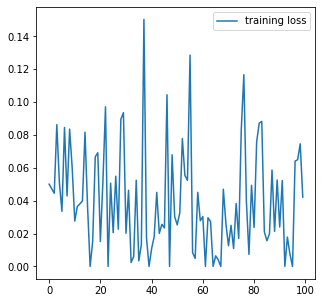

Epoch 0/100[**] - Loss: 0.084670
Epoch 1/100[**] - Loss: 0.022486
Epoch 2/100[***] - Loss: 0.030329
Epoch 3/100[**] - Loss: 0.000000
Epoch 4/100[**] - Loss: 0.018969
Epoch 5/100[***] - Loss: 0.036875
Epoch 6/100[**] - Loss: 0.101466
Epoch 7/100[**] - Loss: 0.062369
Epoch 8/100[***] - Loss: 0.061201
Epoch 9/100[**] - Loss: 0.008096
Epoch 10/100[**] - Loss: 0.007763
Epoch 11/100[***] - Loss: 0.043553
Epoch 12/100[**] - Loss: 0.005785
Epoch 13/100[**] - Loss: 0.019108
Epoch 14/100[***] - Loss: 0.051056
Epoch 15/100[**] - Loss: 0.097976
Epoch 16/100[**] - Loss: 0.149773
Epoch 17/100[***] - Loss: 0.034176
Epoch 18/100[**] - Loss: 0.045118
Epoch 19/100[**] - Loss: 0.057038
Epoch 20/100[***] - Loss: 0.036916
Epoch 21/100[**] - Loss: 0.036139
Epoch 22/100[**] - Loss: 0.016782
Epoch 23/100[***] - Loss: 0.075419
Epoch 24/100[**] - Loss: 0.039281
Epoch 25/100[**] - Loss: 0.050240
Epoch 26/100[***] - Loss: 0.093914
Epoch 27/100[**] - Loss: 0.055518
Epoch 28/100[**] - Loss: 0.041430
Epoch 29/100[**

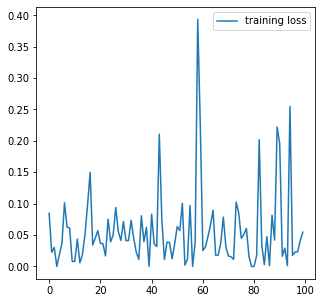

Epoch 0/100[**] - Loss: 0.021129
Epoch 1/100[**] - Loss: 0.028007
Epoch 2/100[***] - Loss: 0.010401
Epoch 3/100[**] - Loss: 0.000989
Epoch 4/100[**] - Loss: 0.023243
Epoch 5/100[***] - Loss: 0.000995
Epoch 6/100[**] - Loss: 0.003751
Epoch 7/100[**] - Loss: 0.047551
Epoch 8/100[***] - Loss: 0.007768
Epoch 9/100[**] - Loss: 0.055303
Epoch 10/100[**] - Loss: 0.045667
Epoch 11/100[***] - Loss: 0.047121
Epoch 12/100[**] - Loss: 0.004922
Epoch 13/100[**] - Loss: 0.083171
Epoch 14/100[***] - Loss: 0.022671
Epoch 15/100[**] - Loss: 0.002358
Epoch 16/100[**] - Loss: 0.000000
Epoch 17/100[***] - Loss: 0.005025
Epoch 18/100[**] - Loss: 0.074014
Epoch 19/100[**] - Loss: 0.193074
Epoch 20/100[***] - Loss: 0.401571
Epoch 21/100[**] - Loss: 0.010069
Epoch 22/100[**] - Loss: 0.030577
Epoch 23/100[***] - Loss: 0.000000
Epoch 24/100[**] - Loss: 0.008639
Epoch 25/100[**] - Loss: 0.033874
Epoch 26/100[***] - Loss: 0.031888
Epoch 27/100[**] - Loss: 0.019560
Epoch 28/100[**] - Loss: 0.052223
Epoch 29/100[**

KeyboardInterrupt: 

In [63]:
####################################################### 
###########################################
dataset1 = DatasetForTripletLoss('c:/IMAGE_PROCESSING/NeyralNetwork/TripletLoss/DATAbase/000/',0) 
dataloader = DataLoader(dataset1, batch_size=5,drop_last=True )
IMAGE_SIZE = [128, 128, 1]   
TL_001 = TL_002_mehanit(imageSize = IMAGE_SIZE, last_activate='linear', device='cpu',numclasses=dataset1.l_ ,show=0)
 
TL_001.compile(criterion='000', optimizer='adam', lr=0.0003, momentum=0.5)
TL_001.summary()
#TL_001.load_state('TL_01.pt')
TL_001.conv2Dfeatures.load_state('conv2Dfeatures01.pt')
TL_001.fully_connect_modul_0.load_state('fully_connect_modul00.pt')         
TL_001.fully_connect_modul_TL.load_state('fully_connect_modul01.pt')         



TL_001.show=0 
min_loss=10
for gn in range(1000):
    H =TL_001.fit_dataloader_TL(  \
                None,loader=dataloader,   epochs = 100, validation_loader = None)
    plt.figure(figsize=(5,5))
    plt.plot(H.history['loss'], label='training loss')
    #plt.plot(H.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()
    loss_=H.history['loss'][-1]
    if loss_<min_loss:
        TL_001.conv2Dfeatures.save_state('conv2Dfeatures01.pt')
        TL_001.fully_connect_modul_TL.save_state('fully_connect_modul01.pt')         
         
        print("loss:  ",loss_)
        min_loss=loss_
        
    dataset1 = DatasetForTripletLoss('c:/IMAGE_PROCESSING/NeyralNetwork/TripletLoss/DATAbase/000/',0) 
    dataloader = DataLoader(dataset1, batch_size=10)
     

In [64]:
TL_001.conv2Dfeatures.save_state('conv2Dfeatures01.pt')
TL_001.fully_connect_modul_TL.save_state('fully_connect_modul01.pt')         


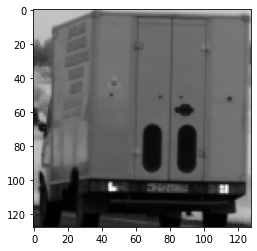

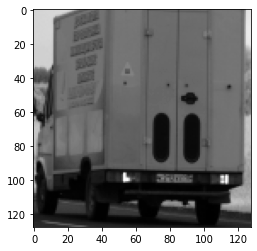

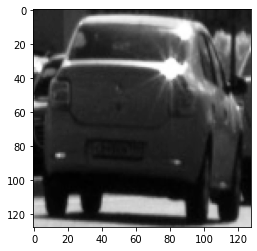

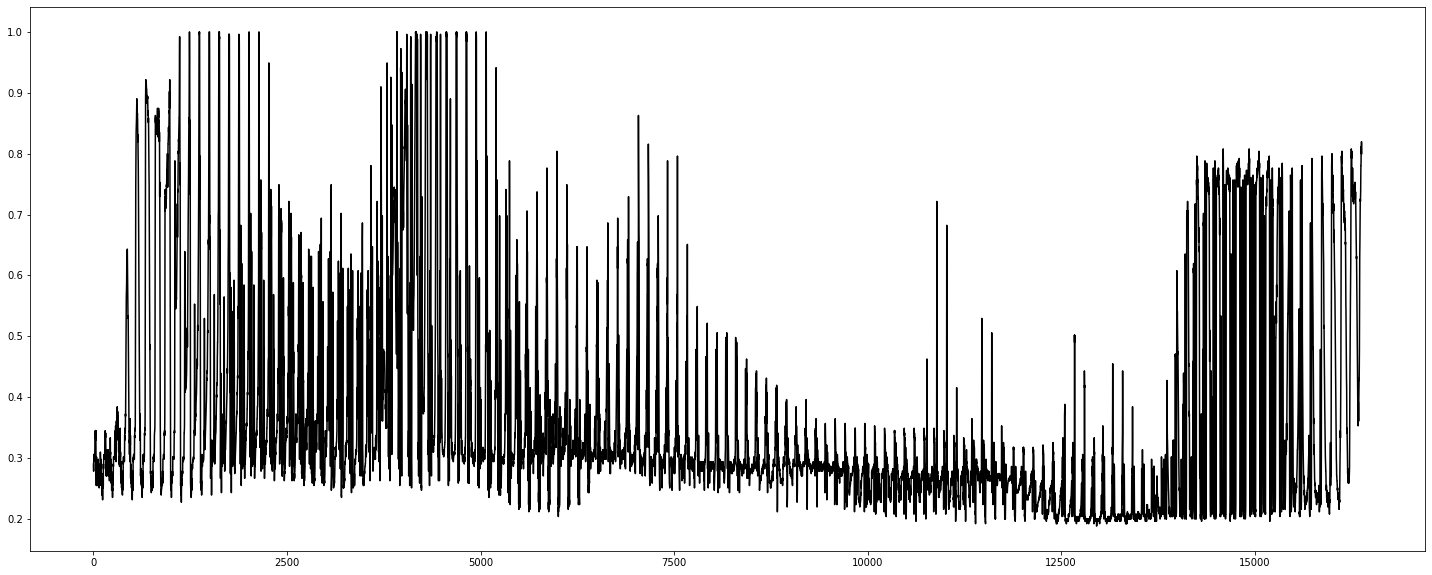

torch.Size([5, 62])


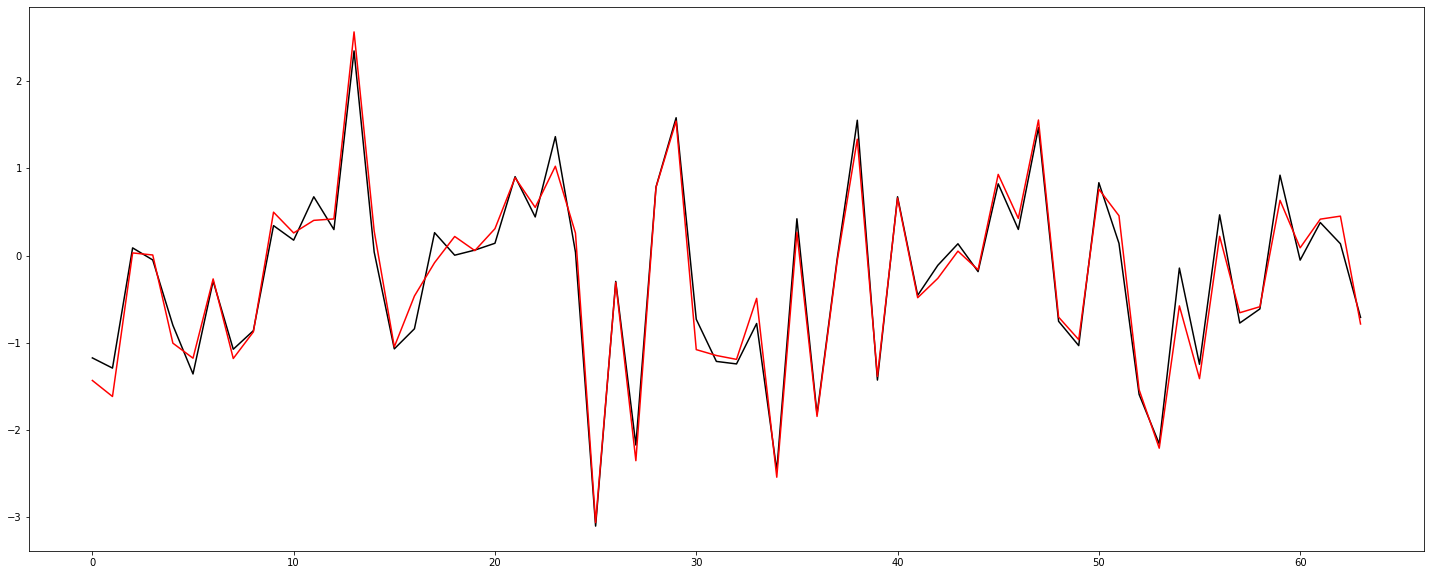

ancor positive


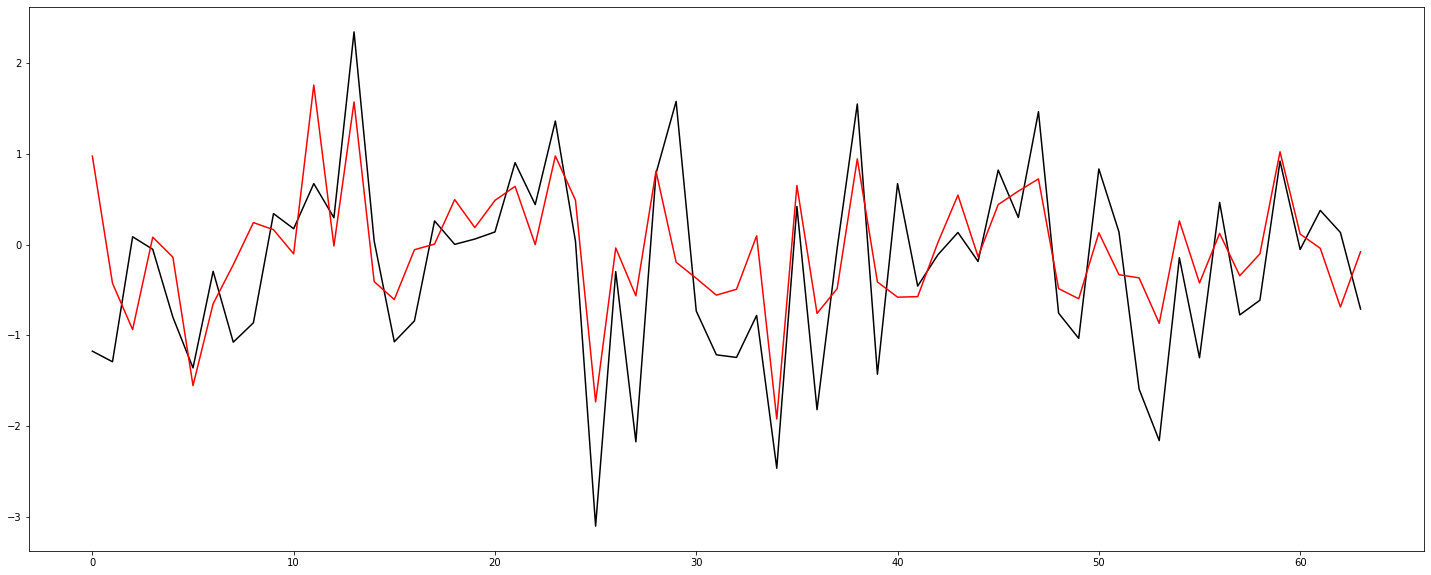

ancor negative


In [11]:
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
ai_2(Anchor[:,:,0])
Positive=batch['Positive'][0].numpy() 
ai_2(Positive[:,:,0])
Negative=batch['Negative'][0].numpy() 
ai_2(Negative[:,:,0])
plot_im(Negative[:,:,0])
class_=batch['class_'] 
print(class_.shape)
TL_001.eval()
x,_ =TL_001.forward_eshar_00( np.expand_dims(Anchor,0) , np.expand_dims(Anchor,0))
y,_ =TL_001.forward_eshar_00( np.expand_dims(Positive,0) , np.expand_dims(Positive,0))
z,_ =TL_001.forward_eshar_00( np.expand_dims(Negative,0) , np.expand_dims(Negative,0))
plot_im_2(x ,y)
 
print('ancor positive')
plot_im_2(x ,z) 
  
print('ancor negative')

In [12]:
def complete_files(dir_name):
    folder = []
    for folder_ in os.listdir(dir_name):
        folder.append(dir_name+folder_)

    files = []
    for fold in folder:
        for file_ in os.listdir(fold + '/'):
            files.append(fold+ '/' +file_)

    numbers = []
    number = 1
    for fold in folder:
        for i in os.listdir(fold + '/'):
            numbers.append(number)
        number += 1
    
    return files, numbers

files, numbers= complete_files('c:/IMAGE_PROCESSING/NeyralNetwork/TripletLoss/DATAbase/003/')
from DiffuseMap_03b import *
TL_001 = TL_002_mehanit(imageSize = IMAGE_SIZE, last_activate='linear', device='cpu',numclasses=dataset1.l_ ,show=0)
 
#TL_001.load_state('TL_01.pt')
TL_001.conv2Dfeatures.load_state('conv2Dfeatures01.pt')
TL_001.fully_connect_modul_0.load_state('fully_connect_modul00.pt')         
TL_001.fully_connect_modul_TL.load_state('fully_connect_modul01.pt')         
TL_001.eval()


features=[]
len_files=min(10000000,len(files))
for rty in range(len_files):
    file_=files[rty]
    stream = open(file_, "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
    stream.close()

    bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 
    resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)

    image_dims = np.expand_dims(resize_image/255, axis=[0,3])
    x,_=TL_001.forward_eshar_00(image_dims , image_dims)
    #plot_im(x)
    features.append(x[0,:])
features  = np.array( features)


set_lbl=set(numbers)
numbers_ =np.array(numbers )
new_features=np.zeros((1,64))
new_labels=[0]
for hja in set_lbl:
    if hja<10: 
        idx_lbl=np.where(numbers_==int(hja))[0]

        class_=features[idx_lbl,:]
        #print(class_.shape)
        step_=max(1,int(len(idx_lbl)/10))
        len_=min(10,len(idx_lbl)) 
        class_katan_=class_[::step_, :] 
        #class_katan_=class_[:len_, :] 
        labels_katan=numbers_[idx_lbl][::step_]
        #labels_katan=numbers_[idx_lbl][:len_]
        new_features=np.concatenate([new_features,class_katan_],0)
        new_labels=np.concatenate( [new_labels,labels_katan],-1)
new_features=new_features[1:,:]
new_labels=new_labels[1: ]

a={'encodings': new_features,'names': new_labels}
with open('data_00.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)


Loading preset weights... Ok.

Loading preset weights... Ok.

Loading preset weights... Ok.


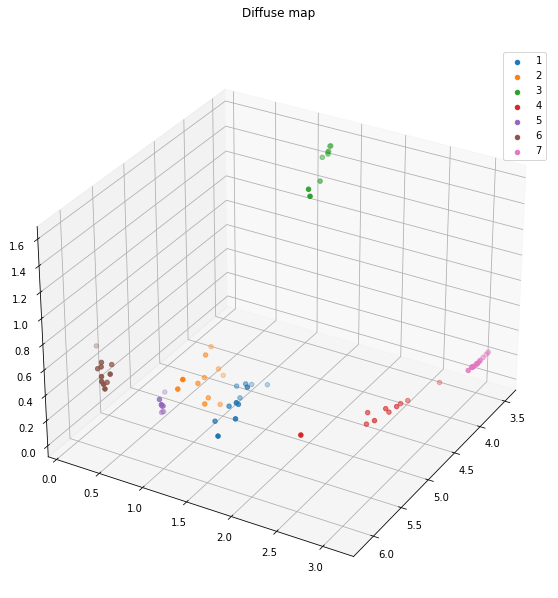

In [13]:
diff_map = DiffuseMap('data_00.pickle',350.1, show=0)
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for lbl, d in diff_map.clusters.items():
    d = abs(d.T)
    ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)


ax.set_title('Diffuse map', pad=30)
ax.view_init(azim=30)
plt.legend()
plt.show()

In [18]:
from matplotlib import image as mpimg
import pickle
import numpy as np
# dmf.import_lib()
import matplotlib.pyplot as plt
import scipy
import statistics
import scipy.signal
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eig, eigh
from scipy.spatial.distance import cosine


#from tracking_source.DiffuseMaps.DiffuseMap_00 import *
class PossibleCluster:
    def __init__(self):
        self.data = []
        self.labels = []
        self.eigen_vectors = []
        self.length = 0
        self.min_entry_dist = 0


class DiffuseMap:
    def __init__(self, encodings_file, eps, load=False, pickle_file='DM_00.pickle', show=1):
        self.b = 0
        self.eps = eps
        self.unknown_clusters = 0
        self.clusters = {}
        self.possible_clusters = {}
        self.cluster_names = []
        self.clusters_entry_dists = {}
        self.eigen_vectors = None
        self.eigen_values = None

        if not load:
            self.raw_data = pickle.loads(open(encodings_file, "rb").read())
            self.data = np.array(self.raw_data['encodings'])
            self.labels = np.array(self.raw_data['names'])
            self.update_diff_map()
            self.save_pickle(pickle_file)
            
            
            
            
        else:
            self.load_from_pickle(pickle_file)
            
        if show:
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(1, 1, 1, projection='3d')
             
            for lbl, d in self.clusters.items():
                d = d.T
                ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)
            
            for lbl, d in self.possible_clusters.items():
                d = d.eigen_vectors.T
                ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)
            ax.set_title('Diffuse map', pad=30)

            plt.legend()
 

    def update_diff_map(self, new_points=None, new_labels=None):

        if new_points is not None:
            new_points = np.array(new_points)
            self.data = np.concatenate((self.data, new_points))
        if new_labels is not None:
            new_labels = np.array(new_labels)
            self.labels = np.concatenate((self.labels, new_labels))

        self.calc_eigen_v(self.get_p())
        (r, c) = self.eigen_vectors.shape
        labels = set(self.labels)
        for l in labels:
            ids = np.where(self.labels == l)
            cluster_ = [self.eigen_vectors[:, i] for i in ids][0]
            self.clusters[l] = cluster_
            self.clusters_entry_dists[l] = 5 * self.calc_cluster_entry_dist(cluster_)

    def get_p(self):
        p_matrix = squareform(pdist(self.data, lambda u, v: np.exp(-(np.linalg.norm(u - v) ** 2 / self.eps))))  # Гауссовское ядро
        return p_matrix
    def get_q(self):
         
        p_matrix = squareform(pdist(self.data, lambda u, v: 1-cosine(u,v)))  # Гауссовское ядро
        return p_matrix

    def calc_eigen_v(self, Q):
        lambda_, psi_ = np.linalg.eig(Q)
        lambda_ = list(lambda_)
        map_projection = lambda_.copy()
        map_projection.sort(reverse=True)
        pos = [lambda_.index(j) for j in map_projection[0:3]]
        eigen_vectors = np.array([map_projection[0] * psi_[:, pos[0]], map_projection[1] * psi_[:, pos[1]], map_projection[2] * psi_[:, pos[2]]])
        #eigen_vectors = np.array( [ psi_[:, pos[0]],  psi_[:, pos[1]],  psi_[:, pos[2]]])

        self.eigen_vectors = eigen_vectors
        self.eigen_values = map_projection
        (r, c) = self.eigen_vectors.shape

        return eigen_vectors, map_projection

    def insert(self, new, visualize=False):
        data1 = []
        for u in new:
            data2 = []
            for v in self.data:
                data2.append(np.exp(-(np.linalg.norm(u - v) ** 2 / self.eps)))
            data1.append(np.array(data2))
        data1 = np.array(data1)

        results = []
        for d in data1:
            results.append([np.dot(d, self.eigen_vectors[0, :].T) / self.eigen_values[0],
                            np.dot(d, self.eigen_vectors[1, :].T) / self.eigen_values[1],
                            np.dot(d, self.eigen_vectors[2, :].T) / self.eigen_values[2]])
        results = np.array(results)

        # add to cluster

        labels_of_given_vectors = []
        for i, dot in enumerate(results):
            # if i > 3:
            #     break
            v = dot.reshape(len(dot), 1)

            dists = {l: self.mahalanobis_01(v, c)[0] for (l, c) in self.clusters.items()}

            dists_key_list = list(dists.keys())
            dists_value_list = list(dists.values())

            min_dist = min(dists_value_list)
            nearest_cluster = dists_key_list[dists_value_list.index(min_dist)]
            cluster_median_dist = self.clusters_entry_dists[nearest_cluster]
            clusters_mean_dist = statistics.mean(self.clusters_entry_dists.values())
            if min_dist <= cluster_median_dist:
                if self.possible_clusters.get(nearest_cluster) is not None:
                    tc = self.possible_clusters[nearest_cluster]
                    tc.data.append(new[i])
                    tc.eigen_vectors = np.append(tc.eigen_vectors, v, axis=1)
                    tc.labels.append(nearest_cluster)
                    tc.length += 1
                    if tc.length >= 4:
                        new_min_dist = self.calc_cluster_entry_dist(tc.eigen_vectors)
                        tc.min_entry_dist = new_min_dist

                    self.possible_clusters[nearest_cluster] = tc
                    labels_of_given_vectors.append(nearest_cluster)

                else:
                    new_cluster = PossibleCluster()
                    new_cluster.eigen_vectors = v
                    new_cluster.data.append(new[i])
                    new_cluster.labels.append(nearest_cluster)
                    new_cluster.length = 1
                    new_cluster.min_entry_dist = clusters_mean_dist
                    self.possible_clusters[nearest_cluster] = new_cluster
                    labels_of_given_vectors.append(nearest_cluster)
                # self.plot3d(50, dot, i, min_dist, nearest_cluster, '../test13/')
            else:
                if len(self.possible_clusters.values()) != 0:
                    p_dists = {}
                    for (l, c) in self.possible_clusters.items():
                        if c.eigen_vectors.shape[1] < 15:
                            p_dists[l] = np.linalg.norm(c.eigen_vectors[:, -1] - v[:, 0])
                        else:
                            p_dists[l] = self.mahalanobis_01(v, c.eigen_vectors)[0]

                    p_dists_key_list = list(p_dists.keys())
                    p_dists_value_list = list(p_dists.values())

                    p_min_dist = min(p_dists_value_list)
                    p_nearest_cluster = p_dists_key_list[p_dists_value_list.index(p_min_dist)]
                    p_clusters_mean_dist = \
                        statistics.mean(list(x.min_entry_dist for x in self.possible_clusters.values()))
                    if p_min_dist <= 6 * self.possible_clusters[p_nearest_cluster].min_entry_dist:
                        tc = self.possible_clusters[p_nearest_cluster]
                        tc.data.append(new[i])
                        tc.labels.append(p_nearest_cluster)
                        tc.eigen_vectors = np.append(tc.eigen_vectors, v, axis=1)
                        tc.length += 1
                        if tc.length >= 4:
                            new_min_dist = self.calc_cluster_entry_dist(tc.eigen_vectors)
                            tc.min_entry_dist = new_min_dist
                        self.possible_clusters[p_nearest_cluster] = tc
                        labels_of_given_vectors.append(p_nearest_cluster)
                    else:
                        new_label = 'New_class' + str(self.unknown_clusters)
                        new_cluster = PossibleCluster()
                        new_cluster.eigen_vectors = v
                        new_cluster.data.append(new[i])
                        new_cluster.labels.append(new_label)
                        new_cluster.length = 1
                        new_cluster.min_entry_dist = clusters_mean_dist
                        self.possible_clusters[new_label] = new_cluster
                        self.unknown_clusters += 1
                        labels_of_given_vectors.append(new_label)
                else:
                    new_label = 'New_class' + str(self.unknown_clusters)
                    new_cluster = PossibleCluster()
                    new_cluster.eigen_vectors = v
                    new_cluster.data.append(new[i])
                    new_cluster.labels.append(new_label)
                    new_cluster.length = 1
                    new_cluster.min_entry_dist = clusters_mean_dist
                    self.possible_clusters[new_label] = new_cluster
                    self.unknown_clusters += 1
                    labels_of_given_vectors.append(new_label)
            # if visualize:
            #     self.plot_diff_map(self.b)


        pc_to_del = []
        for (l, c) in self.possible_clusters.items():
            if c.length >= 50:
                self.update_diff_map(c.data, c.labels)
                pc_to_del.append(l)

        for cl in pc_to_del:
            del self.possible_clusters[cl]

        return labels_of_given_vectors
    def quasy_inv_matr(self, collect_feature, qqq=10**(-10)):
        U, S, V = np.linalg.svd(collect_feature)
        dd = np.diag(np.diag(S))
        S = np.diag(S)
        dd2 = np.multiply(np.sign(dd), np.maximum(qqq, np.abs(dd)))
        dd_ = np.divide(1, dd2 + np.finfo(float).eps)
        S_ = np.diag(dd_)
        S1 = np.transpose(S)
        S1[0:S_.shape[1]][0:S_.shape[0]] = S_
        return np.matmul(np.matmul(V.T, S1), U.T)

    def mahalanobis_01(self, y, x=None):
        if x is None:
            x = self.eigen_vectors
        x = x.T

        y = y.T
        (rx, cx) = x.shape
        (ry, cy) = y.shape

        if cx != cy:
            raise Exception('stats:mahal:InputSizeMismatch')
        if rx < cx:
            raise Exception('stats:mahal:TooFewRows')
        X = np.vstack([x, y])
        V = np.cov(X.T)
        # VI = np.linalg.inv(V)
        VI = self.quasy_inv_matr(V,qqq=1)
        A = np.dot((x - y), VI)
        B = (x - y).T
        D = np.sqrt(np.einsum('ij,ji->i', A, B))
        # print(np.diag(np.sqrt(np.dot(np.dot((x - y), VI), (x - y).T))))
        return np.abs(np.mean(D))

    def mahalanobis_00(self, y, x=None):
        if x is None:
            x = self.eigen_vectors
        x = x.T

        y = y.T
        (rx, cx) = x.shape
        (ry, cy) = y.shape

        if cx != cy:
            raise Exception('stats:mahal:InputSizeMismatch')
        if rx < cx:
            raise Exception('stats:mahal:TooFewRows')
        m = np.mean(x, 0)
        m_y_rows = np.repeat(m.reshape((1, cx)), ry, axis=0)
        m_x_rows = np.repeat(m.reshape((1, cx)), rx, axis=0)
        c = x - m_x_rows
        q, r = scipy.linalg.qr(c, mode='economic')
        ri = np.linalg.solve(r.T, (y - m_y_rows).T)
        return np.ravel(np.multiply(ri, ri).sum(axis=0).T * (rx - 1))

    def calc_cluster_entry_dist(self, cluster):
        dists = []
        temp_cluster = cluster.T
        for i, elem in enumerate(temp_cluster):
            cclust = temp_cluster[np.arange(len(temp_cluster)) != i]
            # elem = np.array(elem)
            elem = elem.reshape(len(elem), 1)
            res = self.mahalanobis_01(elem, cclust.T)
             
            dists.append(res )
        return statistics.median(dists)


    def plot3d(self, k, new_dots, index, mah_dist, near_cluster, images_dir, res_path_out="./plot_out/"):
        fig = plt.figure(figsize=(24, 10))
        ax2 = fig.add_subplot(1, 2, 1)
        image = mpimg.imread(images_dir + str(index).zfill(5) +'.jpg')

        ax = fig.add_subplot(1, 2, 2, projection='3d')

        for lbl, d in self.clusters.items():
            d = d.T
            ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)

        if near_cluster is not None:
            ax.set_title('Diffuse map, \nMin Mahalanobis dist = ' + str(mah_dist) + '; \nNear cluster: ' + near_cluster,
                         pad=30)
        else:
            ax.set_title('Diffuse map, \nMin Mahalanobis dist = ' + str(mah_dist) + '; \nNear cluster: None',
                         pad=30)


        if new_dots.ndim == 1:
            ax.scatter(new_dots[0], new_dots[1], new_dots[2], label='new face')
        else:
            ax.scatter(new_dots[:, 0], new_dots[:, 1], new_dots[:, 2], label='new face')

        ax2.imshow(image)
        plt.legend()
        # plt.show()
        plt.savefig(res_path_out + str(index).zfill(5) + '.jpg')

    def plot_diff_map(self, index=None, camera_image=None):
        if camera_image is not None:
            fig = plt.figure(figsize=(24, 10))
            ax2 = fig.add_subplot(1, 2, 1)
            image = camera_image

            ax = fig.add_subplot(1, 2, 2, projection='3d')

            for lbl, d in self.clusters.items():
                d = d.T
                ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)

            for lbl, d in self.possible_clusters.items():
                d = d.eigen_vectors.T
                ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)
            ax.set_title('Diffuse map', pad=30)

            ax2.imshow(image)
            plt.legend()
            # plt.show()
            res_path_out = "./DiffuseMaps/plot_out/"
            if index is None:
                index = self.b
            plt.savefig(res_path_out + str(index).zfill(5) + '.jpg')

            self.b += 1
            plt.close(fig)
        else:
            fig = plt.figure(figsize=(16, 10))
            ax = fig.add_subplot(1, 1, 1, projection='3d')

            for lbl, d in self.clusters.items():
                d = d.T
                ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)

            for lbl, d in self.possible_clusters.items():
                d = d.eigen_vectors.T
                ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)
            ax.set_title('Diffuse map', pad=30)

            plt.legend()
            # plt.show()
            res_path_out = "./DiffuseMaps/plot_out/"
            if index is None:
                index = self.b
            plt.savefig(res_path_out + str(index).zfill(5) + '.jpg')

            self.b += 1
            plt.close(fig)


    def save_pickle(self, file_name):
        with open(file_name, 'wb') as handle:
            pickle.dump(self, handle, protocol=pickle.HIGHEST_PROTOCOL)

    def load_from_pickle(self, file_name):
        with open(file_name, 'rb') as handle:
            DM = pickle.load(handle)
            self.data = DM.data
            self.possible_clusters = DM.possible_clusters
            self.labels = DM.labels
            self.clusters = DM.clusters
            self.eigen_vectors = DM.eigen_vectors
            self.eigen_values = DM.eigen_values
            self.clusters_entry_dists = DM.clusters_entry_dists
            self.unknown_clusters = DM.unknown_clusters
            self.cluster_names = DM.cluster_names
            self.eps = DM.eps

    def calcMetric(self):
        cluster_mean = []
        cluster_var = []
        for lbl, d in self.clusters.items():
            m = np.mean(d.T, axis=0)
            cluster_mean.append(m)
            cluster_var.append(np.mean(np.square(d.T - m)))
            

        for lbl, d in self.possible_clusters.items():
            m = np.mean(d.eigen_vectors.T, axis=0)
            cluster_mean.append(m)
            cluster_var.append(np.mean(np.square(d.eigen_vectors.T - m)))

        c_m = np.mean(cluster_mean, axis = 0)
        return np.mean(np.square(cluster_mean - c_m)) / np.mean(cluster_var)


<IPython.core.display.Javascript object>


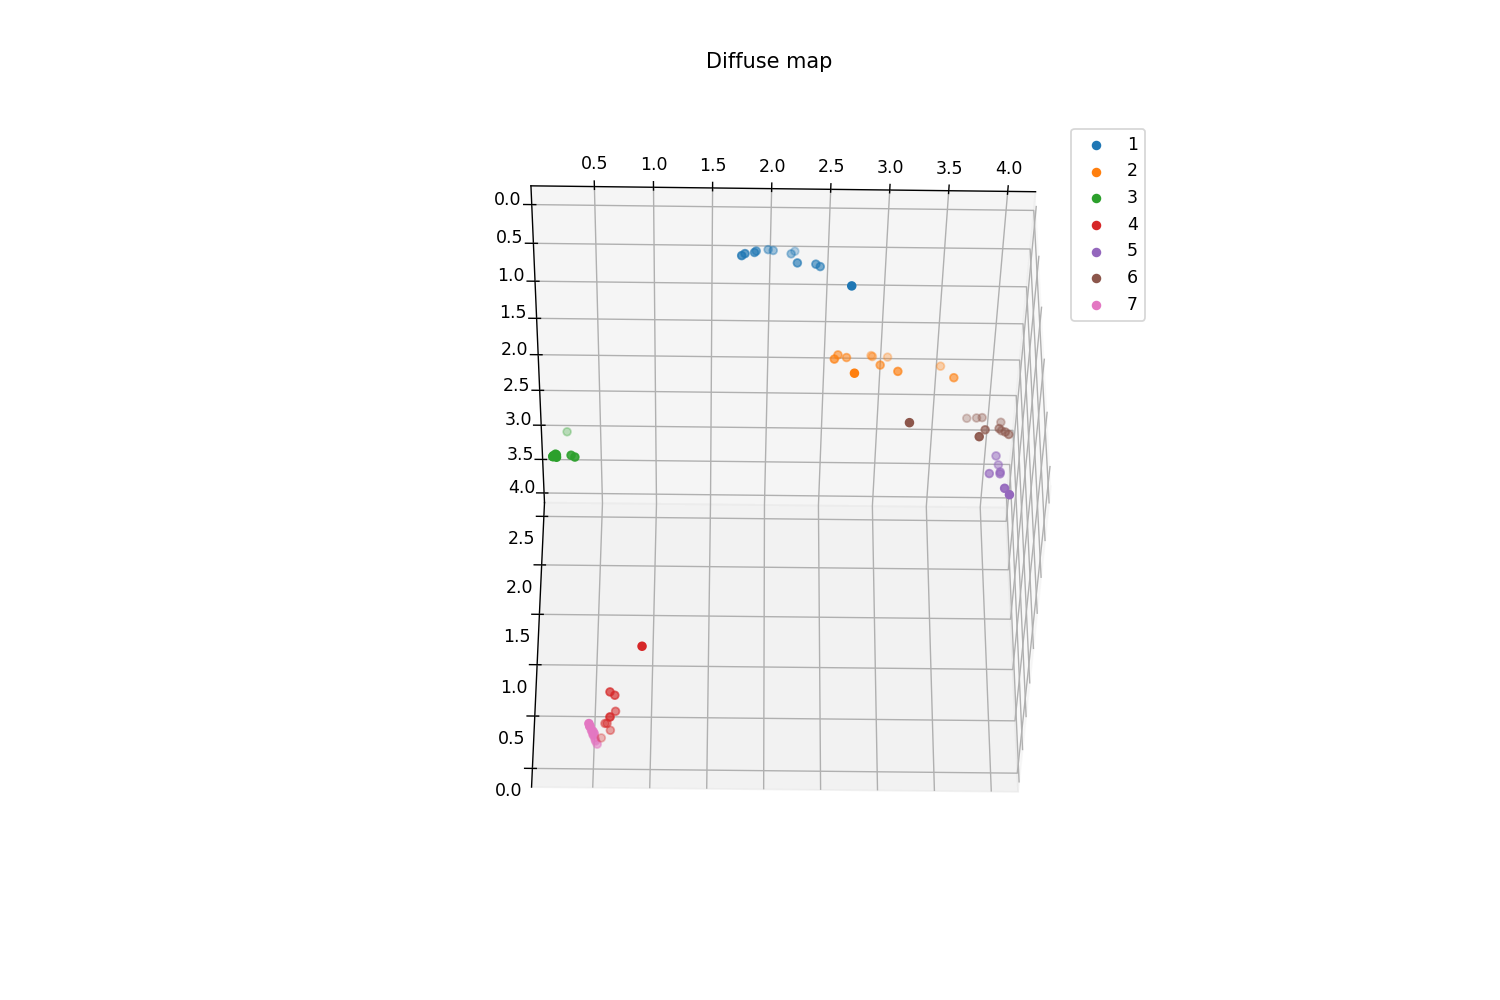

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

%matplotlib notebook


diff_map = DiffuseMap('data_00.pickle',70.1, show=0)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for lbl, d in diff_map.clusters.items():
    d = abs(d.T)
    ax.scatter(d[:, 0], d[:, 1], d[:, 2], label=lbl)


ax.set_title('Diffuse map', pad=30)
ax.view_init(azim=30)
plt.legend()
plt.show()